# Complete re-run 06/12/2024, 30% CV luminex, 50% CV functionals (rpm4, w Xin updates); QC index error corrected

# Load libraries

In [1]:
# install.packages(c('tidyverse','openxlsx','reshape2','gplots','lme4','nlme','ggpubr'))

In [2]:
library(openxlsx)
library(dplyr)
library(reshape2)
#library(lme4)
#library(nlme)
library(gplots)
library(ggplot2)
library(tidyverse)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
v readr     2.1.4     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load Annotation & data template

In [3]:
# annotation
cohort = read.xlsx('../data-raw/Luminex Plate Design 01052022.xlsx')[,-6] %>% 
    select(-Sample.date,-First.dose.date,-Second.dose.date,-Third.dose.date)
head(cohort)
str(cohort)

,PlateNum,SampleNum,PlateID,PlateCoord,BOX,Lab.ID,Vaccine,Tube.Label,Time.sample,DPFD,DPSD,DPTD
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,1,1,A1,1,C64 2020 G4,Naive,S_PUC_C_064_(1)_G4,PRE,NA,NA,NA
2,2,2,1,A2,1,C64 2020 G4,CoronaVac,S_PUC_C_064_(4)_G4,D28,29,1,NA
3,3,3,1,A3,1,C64 2020 G4,CoronaVac-2,S_PUC_C_064_(5)_G4,D42,41,13,NA
4,4,4,1,A4,1,C64 2020 G4,CoronaVac2-2,S_PUC_C_064_(6)_G4,M3,104,76,NA
5,5,5,1,A5,1,C64 2020 G4,CoronaVac2-3,S_PUC_C_064_(7)_G4,M6,153,125,NA
6,6,6,1,A6,1,C64 2020 G4,CoronaVac2-3,S_PUC_C_064_(8)_G4,M9,153,125,NA


'data.frame':	522 obs. of  12 variables:
 $ PlateNum   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ SampleNum  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ PlateID    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PlateCoord : chr  "A1" "A2" "A3" "A4" ...
 $ BOX        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Lab.ID     : chr  "C64 2020 G4" "C64 2020 G4" "C64 2020 G4" "C64 2020 G4" ...
 $ Vaccine    : chr  "Naive" "CoronaVac" "CoronaVac-2" "CoronaVac2-2" ...
 $ Tube.Label : chr  "S_PUC_C_064_(1)_G4" "S_PUC_C_064_(4)_G4" "S_PUC_C_064_(5)_G4" "S_PUC_C_064_(6)_G4" ...
 $ Time.sample: chr  "PRE" "D28" "D42" "M3 " ...
 $ DPFD       : num  NA 29 41 104 153 153 NA 20 34 105 ...
 $ DPSD       : num  NA 1 13 76 125 125 NA NA 13 84 ...
 $ DPTD       : num  NA NA NA NA NA NA NA NA NA NA ...


In [4]:
data_template = read.xlsx('../data-raw/IgG1wholecohort.xlsx')
head(data_template)

,Well,ID,WT.Spike,WT.RBD,WT.S1,WT.S2,WT.NTD,WT.N,Alpha.Spike,Alpha.RBD,...,Gamma.RBD,Delta.Spike,Delta.RBD,OC43.Spike,HKU1.Spike,HCMVgB.Antigen,Influenza.HA,EBOV.Antigen,Omicron.Spike,Omicron.RBD
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1,Naive,2937.5,4082.5,2840.0,4479.0,3433.0,3725.0,8701,4186.5,...,7885.0,6930,3182.0,444760.5,39236.0,12530.5,11342.5,2334.0,61164.0,7213
2,A1,Naive,3048.0,5347.5,3046.0,5525.0,3860.0,4213.5,11731,4596.0,...,8603.5,9905,3986.5,581947.0,54188.0,17411.0,14172.0,2465.0,58349.5,6954
3,A2,CoronaVac,6176.0,7735.5,7286.5,5796.0,3689.0,4258.0,9620,7753.0,...,13106.5,8378,5659.0,429514.0,39335.0,15290.0,11201.0,2391.5,57606.5,7014
4,A2,CoronaVac,8431.0,13793.0,11505.0,8788.5,5283.0,4555.0,15790,14132.0,...,17741.0,14613,8120.0,611267.0,56594.5,25526.5,15566.0,2829.5,51927.0,7814
5,A3,CoronaVac2,40961.0,68087.0,83997.0,94029.0,8589.0,28675.5,71297,60808.0,...,61089.0,50698,41489.0,634387.0,61960.5,23383.5,15391.0,2809.0,99618.0,14570
6,A3,CoronaVac2,52132.0,91221.0,105309.5,129154.0,11048.5,40109.0,97337,74708.0,...,79250.0,77872,62227.0,783903.0,81761.5,28362.0,21152.0,3066.0,117614.0,19621


# First look at replicate quality (CV & Cor)

`summarise()` has grouped output by 'idx'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'idx', 'ID'. You can override using the `.groups` argument.
Using cv as value column: use value.var to override.

Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`)."


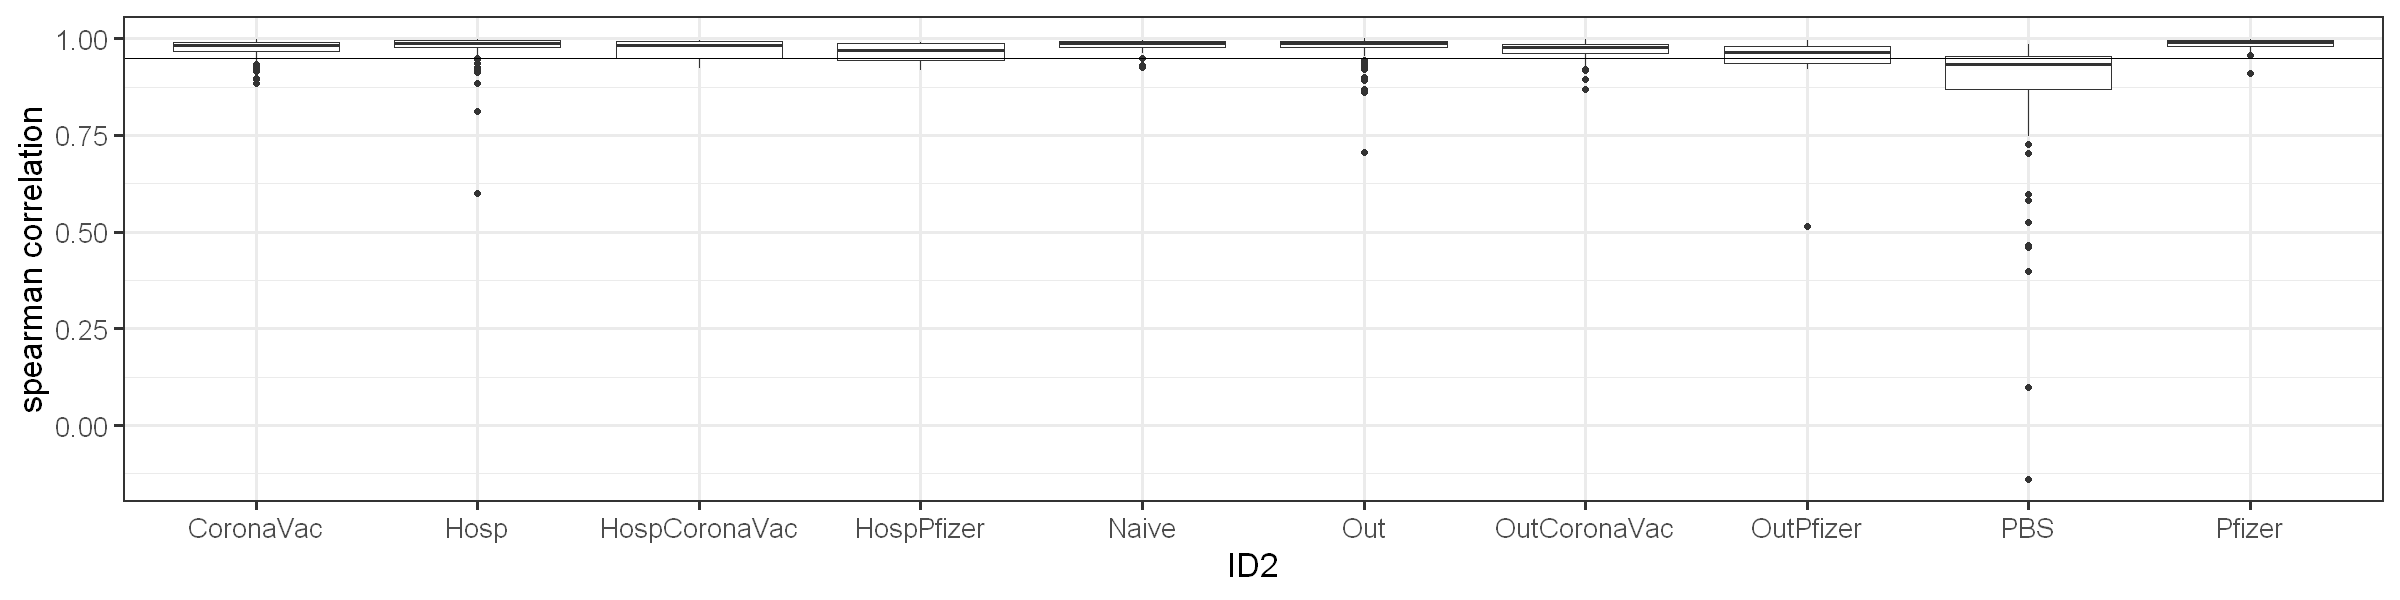

Warning message:
"Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`)."


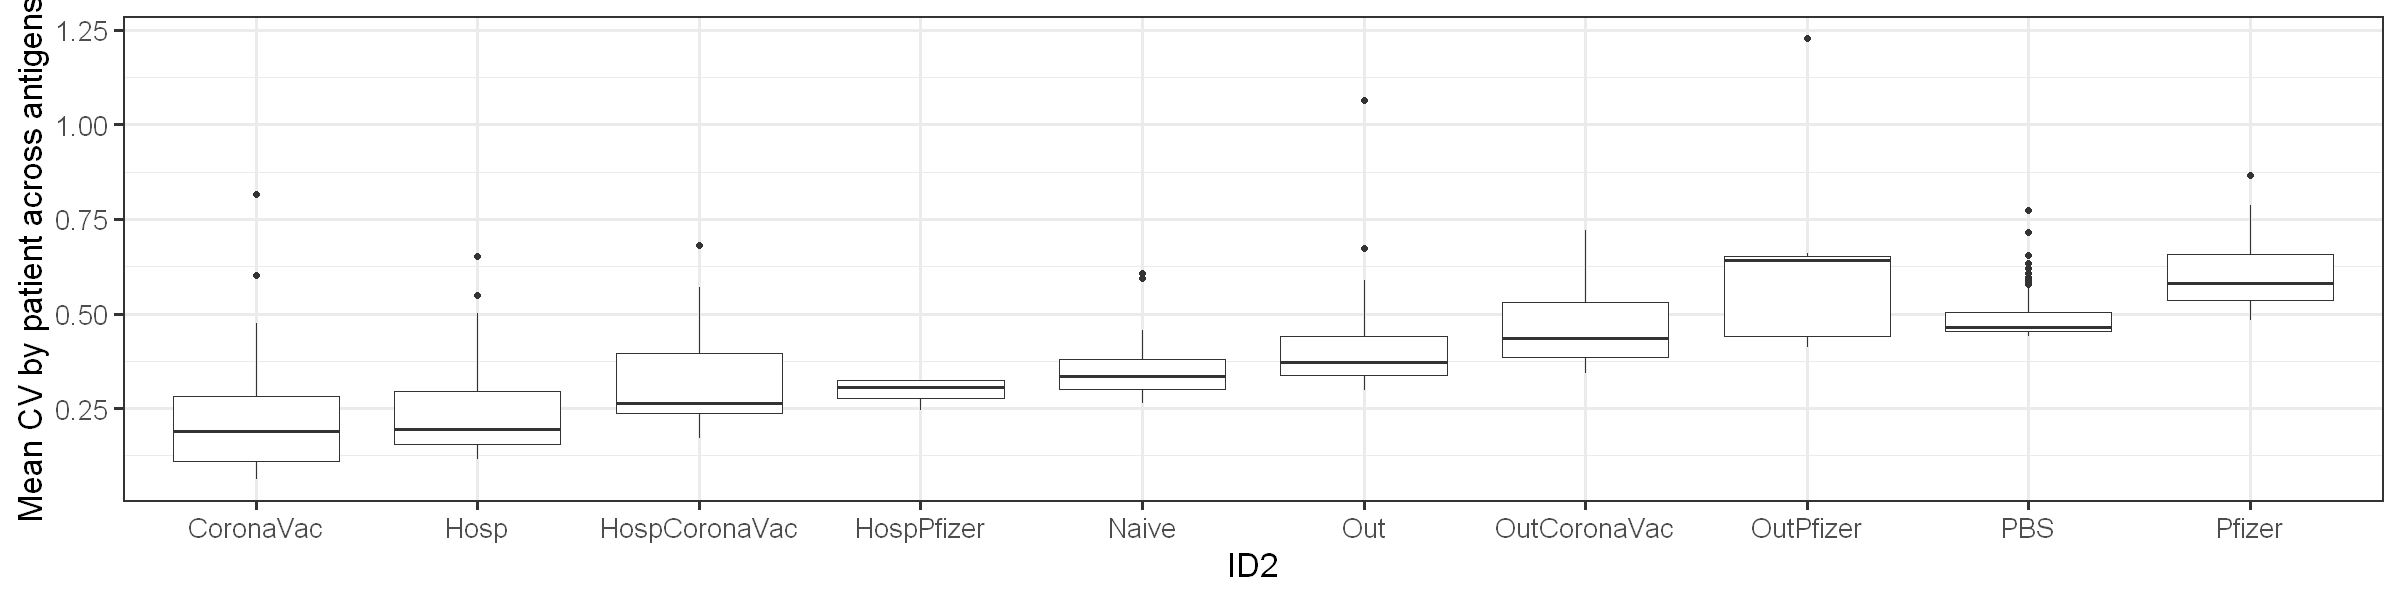

[1] 602  24

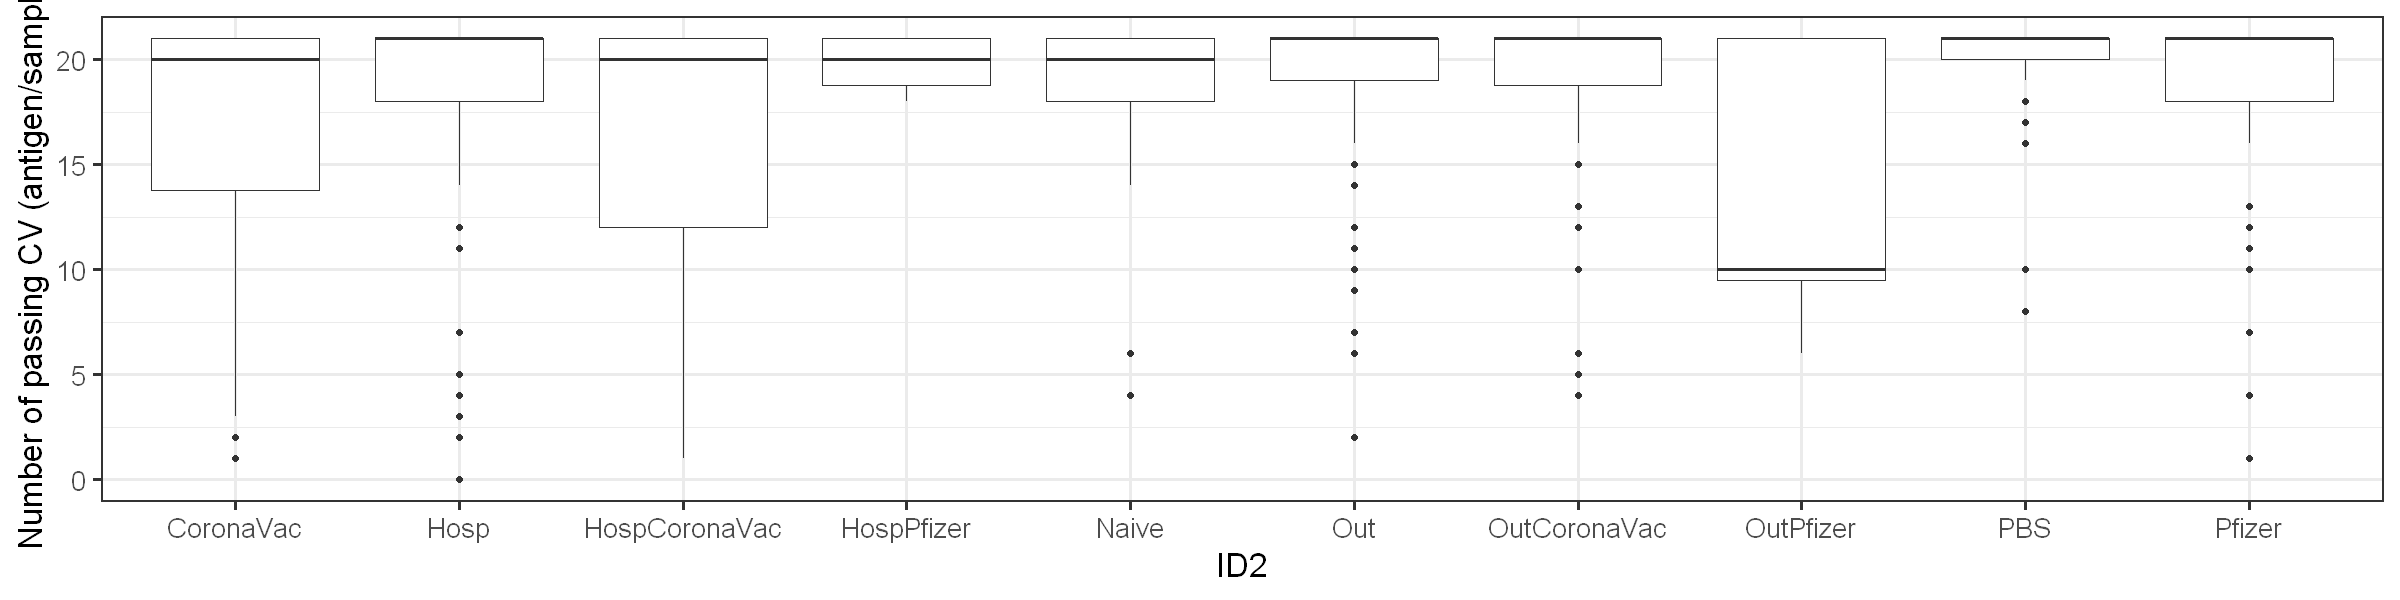

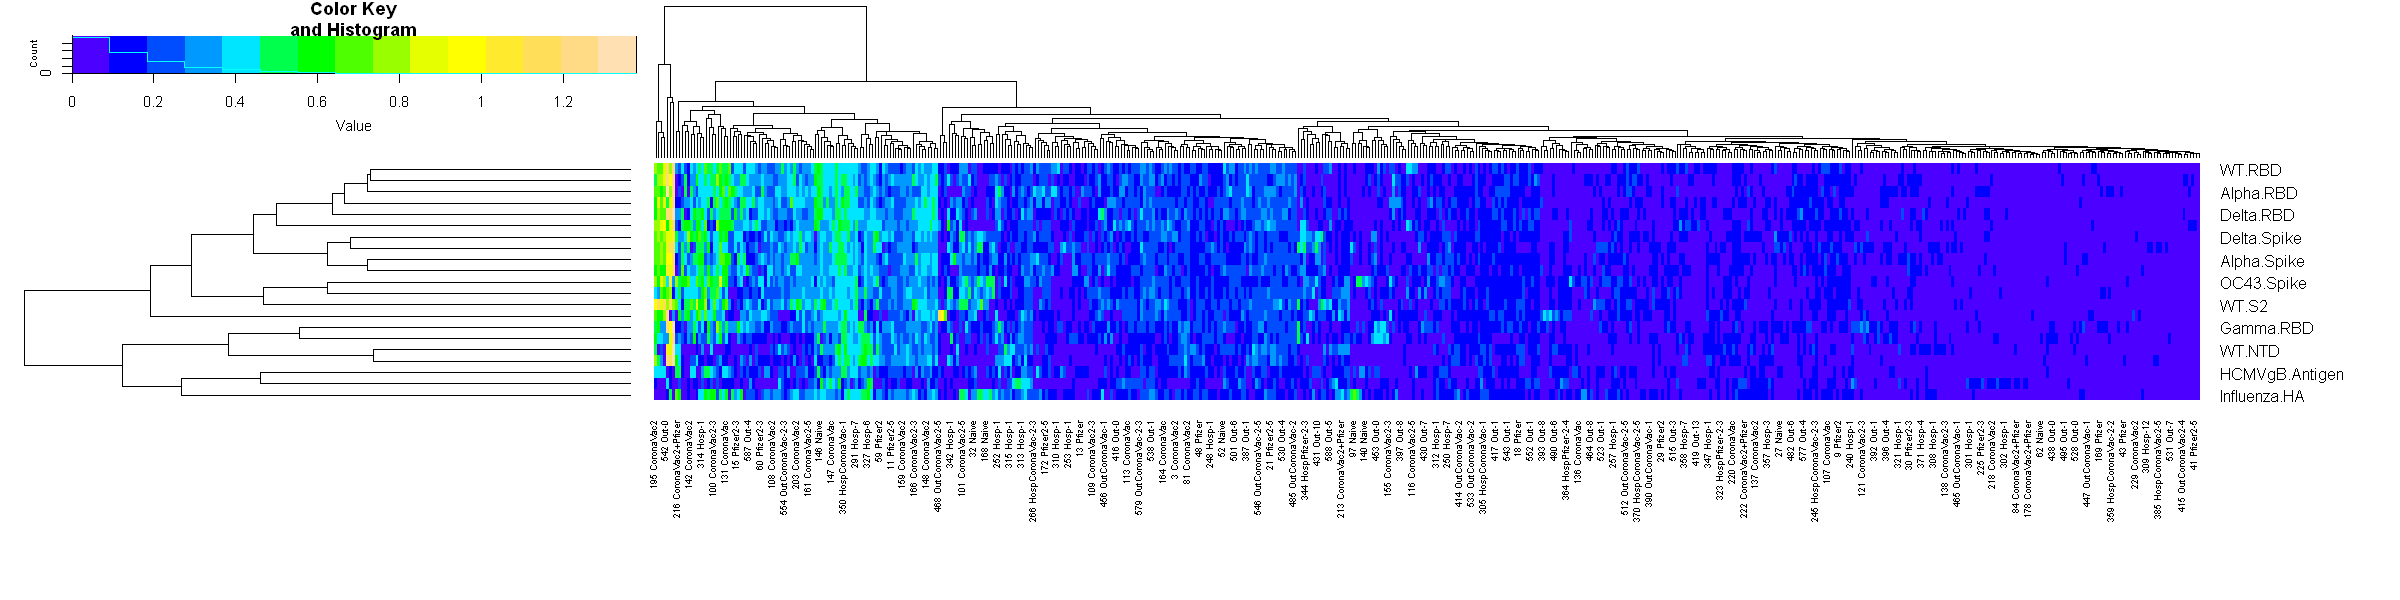

In [5]:
cr_method='spearman'
# cv_cr<-function(data_template){
    tmp=cbind(idx=rep(1:(nrow(data_template)/2),each=2),rep=c('r1','r2'),data_template) %>%
        melt(id.vars = c('idx','rep','Well','ID')) %>% dcast(idx+variable+ID~rep) %>%
            rowwise() %>% 
            mutate(
                mn=mean(c(r1,r2)),
                sd=sd(c(r1,r2))
            ) 
    
    cr=tmp %>% group_by(idx,ID) %>% 
                summarise(
                    cr=cor(r1,r2,method=cr_method)
                ) %>% mutate( ID2 = gsub('-|[0-9].*','',ID) )
# }
# cr
# hist(cr$cr,plot = F)
options(repr.plot.width=20,repr.plot.height=5)
# hist(cr$cr,plot = T,breaks = 40)
ggplot(cr,aes(x=ID2,y=cr))+geom_boxplot()+theme_bw(base_size=20)+ylab(paste0(cr_method,' correlation'))+geom_hline(yintercept = .95)


########

cv=tmp %>% group_by(idx,ID,variable) %>% 
            summarise(
                cv=(sd/mn)
            ) %>% dcast( idx+ID~variable) %>% mutate( ID2 = gsub('-|[0-9].*','',ID) )
    # column_to_rownames(idx) %>% t() 
row.names(cv) = paste( cv$idx,cv$ID)

# head(cv)

ggplot(cv,aes(x=ID2,y=rowMeans(data.matrix(cv[,-c(1:2)]))))+geom_boxplot()+theme_bw(base_size=20)+ylab('Mean CV by patient across antigens')


ggplot(cv,aes(x=ID2,y=rowSums(data.matrix(cv[,-c(1:2)])<0.3)))+geom_boxplot()+theme_bw(base_size=20)+ylab('Number of passing CV (antigen/sample)')
# ggplot(cv,aes(x=ID2,y=colSums(data.matrix(cv[,-c(1:2)])<0.3)))+geom_boxplot()+theme_bw(base_size=20)+ylab('Number of passing CV (sample/antigen)')

dim(cv)
options(repr.plot.width=20,repr.plot.height=5)
# pdf('../data-final/00-cv.pdf',width=30)
gplots::heatmap.2(t(data.matrix(cv[ !grepl('PBS',cv$ID2) ,-c(1,2,ncol(cv))])),trace='none',margins=c(10,10),col=topo.colors)
gplots::heatmap.2(t(data.matrix(cv[ !grepl('PBS',cv$ID2) ,-c(1,2,ncol(cv))])),trace='none',margins=c(10,10),col=topo.colors)
# dev.off()



In [6]:
# head(cv)
# melt(cv,id.vars=c('ID','ID2','idx')) %>% filter(ID!='PBS')  %>% arrange(-value)

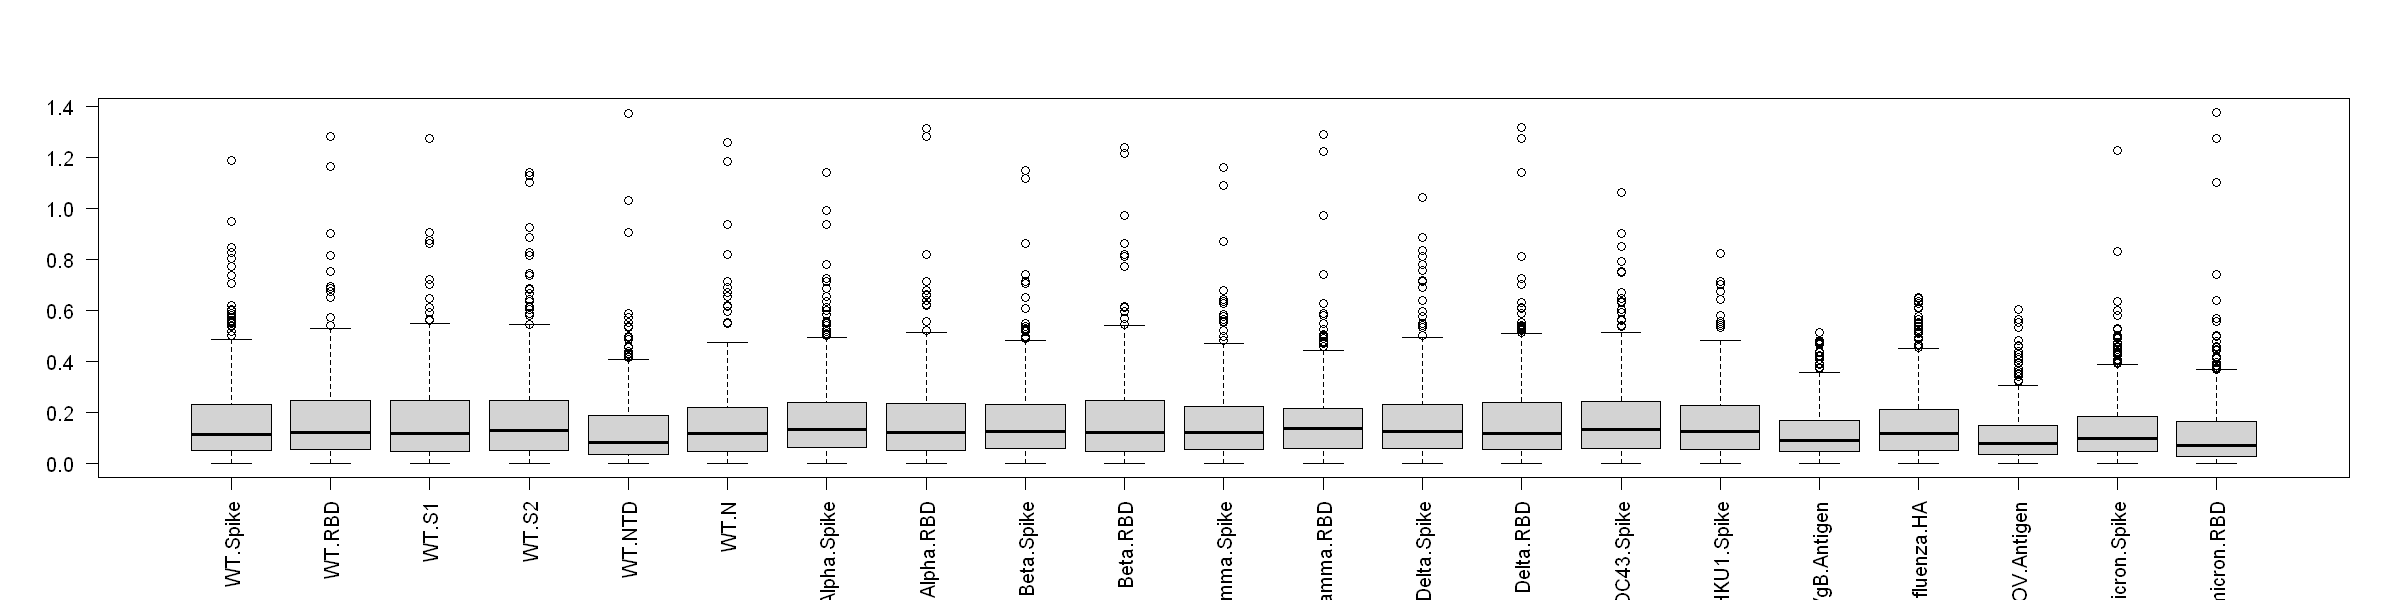

In [7]:
boxplot(data.matrix(cv[ !grepl('PBS',cv$ID2) ,-c(1,2,ncol(cv))]),las=2)

# Filter 1: QC

In [8]:
rep(1:10,each=2)

[1]  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10

In [9]:
# head(r)

# QC function: 
# input
# x; data.frame, columns 1-2 annotation, remaining columns are data, samples in rows (rep1, odd rows; rep2, even rows)
qc<-function(x,cv_thresh=0.3,r_thresh=0){
    # check samples
    rep1=seq(1,nrow(x),2)
    rep2=seq(2,nrow(x),2)
    if(!all(x$ID[rep1]==x$ID[rep2])){stop('not all replicates are aligned')}

    # cv = x
    
    # cv
    cv_cnt=c(0,0)
    for(i in 3:ncol(x)){
        ri=cbind(x[rep1,i],x[rep2,i])
        # print(cbind( apply(ri,1,sd,na.rm=T),apply(ri,1,mean,na.rm=T), 
        #             apply(ri,1,sd,na.rm=T)/apply(ri,1,mean,na.rm=T)))
        cv_i = (apply(ri,1,sd,na.rm=T)/apply(ri,1,mean,na.rm=T))
        # idx=cv_i>cv_thresh ### old
        idx=rep((cv_i>cv_thresh),each=2) ### new 3/5/2024
        idx[is.na(idx)]=F # if NA, then keep remaining measurment
        # print(idx)
        x[idx,i] = NA # mask all measurements that failed cv 
        # cv[,i] = cv_i
        cv_cnt=c(cv_cnt[1]+sum(idx),cv_cnt[2]+length(x[,i]))
    }
    
    # correlation
    cr_cnt=c(0,0)
    for(i in rep1){
        mi=t(rbind(x[i,-(1:2)],x[i+1,-(1:2)]))
        # print(mi)
        cri=cor(mi[,1],mi[,2], use = "pairwise.complete.obs")
        if(is.na(cri)){cri=0}
        if(cri<r_thresh){ # cr thresh failed
            x[i,-(1:2)]=NA; x[i+1,-(1:2)]=NA # mask sample
            cr_cnt[1]=cr_cnt[1]+1
        }
        cr_cnt[2]=cr_cnt[2]+1
    }
    print(paste( 'CV filter removed:',cv_cnt[1],'of',cv_cnt[2],
                'obs.\nCor filter removed:',cr_cnt[1],'of',cr_cnt[2],'samples.'))
    # return(list(x,cv))
    return(x)
}

# Load luminex data

In [10]:
fls = list.files('../data-raw/',pattern='*cohort.xlsx',full.names = T)

out = list()
out_raw=list()

all_data_vars = c()

check=list()

for(f in fls){

    n = gsub('.*raw/','',gsub('whole.*','',f))
    print(n)
        if(grepl('^~',n)){next}
    
    # read data
    r = read.xlsx(f)
    is.phago = grepl('^A',n)
    if(is.phago){next}

    
    ## fix colnames
    colnames(r) = colnames(data_template)

    r = r[1:nrow(data_template),]
    r[,1:2] = data_template[,1:2]
    annotation_i = rbind(cohort,cohort) %>% arrange(SampleNum)
    annotation_i$order = 1:nrow(annotation_i)

    
    PBS =     r %>% filter(ID == 'PBS')
    luminex = r %>% filter(ID != 'PBS') 

    # run QC
    check[[f]]=list(luminex,qc(luminex))
    luminex = qc(luminex)
    # luminex = out[[1]]
    # cv_check = out[[2]]
    # luminex = out

    ### debug 
    # tmp=merge(
    #     melt(luminex %>% rownames_to_column(),id.vars = c('rowname','Well','ID')),
    #     melt(cv_check %>% rownames_to_column(),id.vars = c('rowname','Well','ID'),value.name = 'cv') 
    # )
    # tmp$value[is.na(tmp$value)] = -1e5
    # print( table( value=cut(tmp$value,c(-1e6,-1e5,-1e3,0,1e4,1e5,1e6,1e7)), cv=cut(tmp$cv,c(NA,0,0.1,0.3,0.5,2)))) 
    
    # merge data with annotation
    data=cbind(annotation_i,luminex) %>%
        group_by(PlateNum,SampleNum,PlateID,PlateCoord,Well,ID,
                 BOX,Lab.ID,Vaccine,Tube.Label,Time.sample) %>% 
        summarise_all(
            mean,na.rm=T # summarise replicates
        ) %>% arrange(PlateNum)

    data$vaccine = gsub('[0-9]$','',gsub('-[0-9]$','',data$ID))
    data$group = substr(data$Lab.ID,1,1)
    
    # print(head(data))
    
    # get var types
    annot_vars = colnames(data)[c(1:15,37:38)]
    data_vars = colnames(data)[16:36]
    
    # print(annot_vars)
    # print(data_vars)

    data_norm = data
        
    # normalize
#     PBS_byplate = na.omit(cbind( PlateNum = c(rep(1:6,each=24),rep(7,16)) , PBS)) %>%
#         select(-Well,-ID) %>%
#         group_by(PlateNum) %>% summarise_all(median)

#     # index match data
#     PBS_byplate = do.call(rbind,lapply(data$PlateID,function(plt){
#         PBS_byplate[PBS_byplate$PlateNum==plt,]
#     }))[,-1]

#     if(any(! colnames(PBS) %in% colnames(data))){stop('missing colnames')}

#     # non-responsder floor
#     data_norm[,colnames(PBS_byplate)] = data_norm[,colnames(PBS_byplate)] - PBS_byplate
#     data_norm[,colnames(PBS_byplate)][data_norm[,colnames(PBS_byplate)]<1] = 1
    data_backgnd = data_norm
    
    # foldchange norm
    data_norm[,data_vars] = apply(data_norm[,data_vars],2,function(x) x / median(x[data_norm$ID=='Naive'],na.rm=T )) 
    # name
    colnames(data)[colnames(data)%in%data_vars] = paste(colnames(data[,data_vars]),n,sep='.')
    colnames(data_norm)[colnames(data_norm)%in%data_vars] = paste(colnames(data_norm[,data_vars]),n,sep='.')
    out[[n]] = data_norm
    out_raw[[n]] = data
}
                                  

data_lum = out_raw %>% reduce(full_join) %>% arrange(order)
data_norm_lum = out %>% reduce(full_join) %>% arrange(order) #%>% arrange(Tube.Label)
                                  
write.csv(data_lum,file='../data-final/data_luminex.csv')

head(data_norm[,-(1:5)])
dim(data_norm)

[1] "C1q"
[1] "CV filter removed: 1690 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 1690 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "IgA1"
[1] "CV filter removed: 82 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 82 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "IgG1"
[1] "CV filter removed: 3146 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 3146 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "IgG2"
[1] "CV filter removed: 90 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 90 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "IgG3"
[1] "CV filter removed: 58 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 58 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "IgG4"
[1] "CV filter removed: 2 of 21924 obs.\nCor filter removed: 0 of 522 samples."
[1] "CV filter removed: 2 of 21924 ob

Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, group)`
Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, group)`
Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, group)`
Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, group)`
Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, group)`
Joining with `by = join_by(PlateNum, SampleNum, PlateID, PlateCoord, Well, ID, BOX, Lab.ID, Vaccine, Tube.Label,
Time.sample, DPFD, DPSD, DPTD, order, vaccine, 

ID,BOX,Lab.ID,Vaccine,Tube.Label,Time.sample,DPFD,DPSD,DPTD,order,...,Delta.RBD.R3b,OC43.Spike.R3b,HKU1.Spike.R3b,HCMVgB.Antigen.R3b,Influenza.HA.R3b,EBOV.Antigen.R3b,Omicron.Spike.R3b,Omicron.RBD.R3b,vaccine,group
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Naive,1,C64 2020 G4,Naive,S_PUC_C_064_(1)_G4,PRE,NaN,NaN,NaN,1.5,...,1.040095,22.8923047,1.042546,0.9851430,0.6880567,0.9717149,1.3648657,1.0333011,Naive,C
Naive,2,C94 2021 G4,Naive,S_PUC_C_094_(1)_G4,PRE,NaN,NaN,NaN,169.5,...,1.027064,0.9427222,1.006665,21.0231786,1.0155590,0.9767264,0.5078688,0.9790659,Naive,C
CoronaVac2+Pfizer,3,C114 2021 G4,BNT162b2,S_PUC_C_114_(3)_G4,M9,231,203,14,337.5,...,119.380262,1.1062067,1.010998,0.7071679,0.8272902,1.0344007,1.1627623,NaN,CoronaVac2+Pfizer,C
Hosp-1,4,p10 2020 G4,NA,S_PUC_H_010_(1)_G4,D21,18,NaN,NaN,505.5,...,150.422635,81.8033784,16.595090,17.3015319,1.6694776,1.1725134,0.7731649,1.9472848,Hosp,p
HospCoronaVac2-5,5,p117 2020 G4,CoronaVac,S_PUC_H_117_(3)_G4,M6 v,356,175,146,673.5,...,1.645708,5.5744612,1.221951,3.0875659,0.5373195,1.0814576,0.7835256,1.0724748,HospCoronaVac,p
Out-5,6,op39 2020 G4,NA,S_PUC_O_039_(1)_G4,M3,140,NaN,NaN,841.5,...,1.015309,2.4876060,1.227561,0.6906088,0.5526919,1.0729636,0.5989862,1.0329556,Out,o


[1] 522  38

In [11]:
# i=c(7736,13793)
# sd(i)/mean(i)

In [12]:
# stop()

In [13]:
dim(data_norm)
dim(data_lum)
dim(data_norm_lum)

[1] 522  38

[1] 522 248

[1] 522 248

In [14]:
# data_lum[grepl('PUC_C_',data_lum$Tube.Label),1:20] %>% head()


# Swap labels: vaccine cohort only, all detectors, all VOC except WT, luminex only

In [15]:
## 5/30 - swaping was commented out to produce erroneous plots in script 01b

### swap RBD and Spike column names; bead regions were mislabelled
# colnames(data_lum) = gsub('OC43.RBD','OC43.Spike',gsub('HKU1.RBD','HKU1.Spike',gsub('tmp','RBD',gsub('RBD','Spike',gsub('Spike','tmp',colnames(data_lum)))))) 
# colnames(data_norm_lum) = gsub('OC43.RBD','OC43.Spike',gsub('HKU1.RBD','HKU1.Spike',gsub('tmp','RBD',gsub('RBD','Spike',gsub('Spike','tmp',colnames(data_norm_lum))))))

## 6/12 - swapping reinstated

## swap RBD and Spike column names; bead regions were mislabelled

# get vaccine cohort index
vaccine_cohort = grepl('PUC_C_',data_lum$Tube.Label)

# split raw data
vax = data_lum[vaccine_cohort,]
inf = data_lum[!vaccine_cohort,]

# split normalized data
vax_norm = data_norm_lum[vaccine_cohort,]
inf_norm = data_norm_lum[!vaccine_cohort,]

# swap all
colnames(vax) = gsub('OC43.RBD','OC43.Spike',gsub('HKU1.RBD','HKU1.Spike', # unswap HKU and OC43
                                                  gsub('tmp','RBD',gsub('RBD','Spike',gsub('Spike','tmp',colnames(vax)))))) # swap all
colnames(vax_norm) = gsub('OC43.RBD','OC43.Spike',gsub('HKU1.RBD','HKU1.Spike', # unswap HKU and OC43
                                                       gsub('tmp','RBD',gsub('RBD','Spike',gsub('Spike','tmp',colnames(vax_norm)))))) # swap all

# swap WT back (effect, no WT swap)
colnames(vax) = gsub('tmp','WT.RBD',gsub('WT.RBD','WT.Spike',gsub('WT.Spike','tmp',colnames(vax)))) 
colnames(vax_norm) = gsub('tmp','WT.RBD',gsub('WT.RBD','WT.Spike',gsub('WT.Spike','tmp',colnames(vax_norm))))

data_lum = rbind( vax , inf[colnames(vax)])
data_norm_lum = rbind( vax_norm , inf_norm[colnames(vax_norm)])


# Load neutralization data

In [16]:
# ################
neut = do.call(rbind,
               lapply(1:3,function(x) openxlsx::read.xlsx('../data-raw/Serum-Samples_MedinaLab_October 15-2021_Neutralization_090922_MJAV.xlsx',sheet=x) [,c('Lab.ID','Tube.Label','IC50','Log10.IC50')[1:3]]))
neut = neut%>%rename(WT.Spike.NeutIC50=IC50)
head(neut)

,Lab.ID,Tube.Label,WT.Spike.NeutIC50
,<chr>,<chr>,<dbl>
1,C64 2020 G4,S_PUC_C_064_(1)_G4,739.66485
2,C64 2020 G4,S_PUC_C_064_(4)_G4,31.54421
3,C64 2020 G4,S_PUC_C_064_(5)_G4,266.36199
4,C64 2020 G4,S_PUC_C_064_(6)_G4,NA
5,C64 2020 G4,S_PUC_C_064_(7)_G4,1.00000
6,C64 2020 G4,S_PUC_C_064_(8)_G4,NA


In [17]:
Naive_ID = unique(data_norm$Lab.ID[data_norm$ID=='Naive'])
neut_norm = neut
neut_norm$WT.Spike.NeutIC50 = neut_norm$WT.Spike.NeutIC50 / median( neut$WT.Spike.NeutIC50[ neut$Lab.ID%in%Naive_ID ] , na.rm=T)


In [18]:
# # boxplot( neut$WT.Spike.NeutIC50[ !neut$Lab.ID%in%Naive_ID ])
# # boxplot(log(neut$WT.Spike.NeutIC50[ neut$Lab.ID%in%Naive_ID ]))
# ggplot(neut,aes(y=WT.Spike.NeutIC50,x=neut$Lab.ID%in%Naive_ID))+geom_boxplot()+scale_y_log10()
# ggplot(neut_norm,aes(y=WT.Spike.NeutIC50,x=neut_norm$Lab.ID%in%Naive_ID))+geom_boxplot()+scale_y_log10()

In [19]:
                      
dim(data_lum)
dim(data_norm_lum)
data_lum = merge(data_lum,neut,by=c('Lab.ID','Tube.Label'))
data_norm_lum = merge(data_norm_lum,neut_norm,by=c('Lab.ID','Tube.Label'))
dim(data_lum)
dim(data_norm_lum)
                      ##########

[1] 522 248

[1] 522 248

[1] 522 249

[1] 522 249

In [20]:

# # merge neutralization data
# data_lum = data_lum %>% rename(WT.Spike.NeutIC50=WT.RBD.NeutIC50)
# data_norm_lum = data_norm_lum %>% rename(WT.Spike.NeutIC50=WT.RBD.NeutIC50)


In [21]:
dim(data_norm_lum)
head(data_norm_lum)

[1] 522 249

,Lab.ID,Tube.Label,PlateNum,SampleNum,PlateID,PlateCoord,Well,ID,BOX,Vaccine,...,Delta.RBD.R3b,Delta.Spike.R3b,OC43.Spike.R3b,HKU1.Spike.R3b,HCMVgB.Antigen.R3b,Influenza.HA.R3b,EBOV.Antigen.R3b,Omicron.RBD.R3b,Omicron.Spike.R3b,WT.Spike.NeutIC50
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C100 2021 G4,S_PUC_C_100_(1)_G4,22,106,2,B10,B10,Naive,2,Naive,...,0.9891253,0.9734828,0.9656333,0.9936681,0.6267258,0.6012182,0.9690818,0.4446363,1.0119525,0.01673196
2,C100 2021 G4,S_PUC_C_100_(3)_G4,23,107,2,B11,B11,CoronaVac,2,CoronaVac,...,0.9408543,1.0108438,0.9442107,1.0142746,0.6383256,0.5264605,0.9864096,0.4694015,0.9568191,0.01673196
3,C100 2021 G4,S_PUC_C_100_(4)_G4,24,108,2,B12,B12,CoronaVac2,2,CoronaVac,...,0.9582225,1.2510479,0.8849913,0.9688958,0.6265577,0.5725436,1.0282001,0.3917167,0.9999309,3.99254936
4,C100 2021 G4,S_PUC_C_100_(5)_G4,25,109,2,C1,C1,CoronaVac2-3,2,CoronaVac,...,0.8878110,0.9746674,0.9055077,0.9832259,0.6468153,13.2540170,1.0599677,0.6286957,0.9699461,3.25549009
5,C100 2021 G4,S_PUC_C_100_(6)_G4,26,110,2,C2,C2,CoronaVac2-5,2,CoronaVac,...,1.0045376,0.9983598,0.8858326,0.9552877,0.6361822,7.5154148,0.9939693,0.7999029,0.9912256,0.40783757
6,C100 2021 G4,S_PUC_C_100_(7)_G4,27,111,2,C3,C3,CoronaVac2+Pfizer,2,BNT162b2,...,13.8485370,150.8237653,0.9352145,1.0014441,0.6371488,4.9282793,1.0085790,0.9308876,3.6118557,NA


# Load functional data

In [22]:
data = read.csv('../data-raw/data_functionalsrpmv4.csv') 
colnames(data)[1]='plate'
data = data %>% arrange(plate,Well,Tubelabel) %>% mutate(rep=1+as.numeric(duplicated(Tubelabel)))
col_order = colnames(data)

In [23]:
head(data)

,plate,Tubelabel,Well,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP,rep
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,p1,S_PUC_C_064_(1)_G4,A01,Naive,1295.468,3355.299,1163.731,1146.978,1
2,p1,S_PUC_C_064_(1)_G4,A01,Naive,2029.401,4358.337,1322.905,1709.502,2
3,p1,S_PUC_C_064_(4)_G4,A02,CoronaVac,4492.933,4883.674,3435.389,1637.511,1
4,p1,S_PUC_C_064_(4)_G4,A02,CoronaVac,2171.717,2144.699,2028.699,1518.937,2
5,p1,S_PUC_C_064_(5)_G4,A03,CoronaVac2,9035.177,7199.896,7756.792,2337.782,1
6,p1,S_PUC_C_064_(5)_G4,A03,CoronaVac2,6073.862,3296.727,5709.929,1525.509,2


In [24]:
# infect_func_adnp_omicron_rerun = read.csv('../data-raw/Functional_Reorganized_XT_12072023.csv')
infect_func_adnp_omicron_rerun1 = openxlsx::read.xlsx('../data-raw/Functional_Reorganized_XT_Replicates_12222023.xlsx',sheet = 1) %>% mutate(rep=1)
infect_func_adnp_omicron_rerun2 = openxlsx::read.xlsx('../data-raw/Functional_Reorganized_XT_Replicates_12222023.xlsx',sheet = 2) %>% mutate(rep=2)
infect_func_adnp_omicron_rerun = rbind(infect_func_adnp_omicron_rerun1,infect_func_adnp_omicron_rerun2)
# head(infect_func_adnp_omicron_rerun)
infect_func_adnp_omicron_rerun=infect_func_adnp_omicron_rerun %>% 
    select(TubeID,ID,Omicron_ADNP_Phago.BL3,rep) %>% filter(ID!='PBS'&!is.na(TubeID)) %>%
    select(-ID)

dim(data)
tmp = merge( data,infect_func_adnp_omicron_rerun,all.x=T,by.x=c('Tubelabel','rep'),by.y=c('TubeID','rep'))
tmp$Omicron.Spike.ADNP = ifelse( is.na(tmp$Omicron_ADNP_Phago.BL3) , tmp$Omicron.Spike.ADNP , tmp$Omicron_ADNP_Phago.BL3 )
dim(tmp)
# head(tmp) 

# tail(infect_func_adnp_omicron_rerun%>%arrange(TubeID))
# data$Omicron.Spike.ADNP = ifelse( data$Tubelabel %in% infect_func_adnp_omicron_rerun$TubeID , 
#                                  infect_func_adnp_omicron_rerun$Omicron_ADNP_Phago.BL3,
#                                  data$Omicron.Spike.ADNP )

# options(repr.plot.height=10)
# # merge( data, infect_func_adnp_omicron_rerun %>% select(TubeID,Omicron_ADNP_Phago.BL3) , by.x = 'Tubelabel',by.y='TubeID') %>% 
#     ggplot(tmp,aes(x=Omicron.Spike.ADNP,y=Omicron_ADNP_Phago.BL3)) + geom_point() + geom_abline(intercept = 0,slope=1)+ #+ geom_hline(yintercept = 400)+
#     theme_bw(base_size = 20)


data = tmp %>% select( -Omicron_ADNP_Phago.BL3 ) %>% arrange(plate,Tubelabel)
data = data[,col_order] %>% select(-rep)
head(data)



[1] 1174    9

[1] 1174   10

,plate,Tubelabel,Well,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,p1,,H01,PBS,1249.332,1824.445,1124.688,974.3782
2,p1,,H01,PBS,1648.115,2718.061,1213.435,1797.6633
3,p1,,H02,PBS,2162.098,2941.832,3333.099,1321.1153
4,p1,,H02,PBS,1204.977,2266.597,2461.874,1751.5072
5,p1,,H03,PBS,1005.312,1780.611,1126.250,685.4523
6,p1,,H03,PBS,2392.120,3313.010,1161.851,1446.3755


In [25]:
# x = data
# rep1=seq(1,nrow(x),2)
# rep2=seq(2,nrow(x),2)
# all(x$ID[rep1]==x$ID[rep2])

In [26]:
# data[,-(1:2)] 
tmp= qc(data[,-(1:2)],cv_thresh=.5,r_thresh=0)

head(tmp )

[1] "CV filter removed: 618 of 4696 obs.\nCor filter removed: 18 of 587 samples."


,Well,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,H01,PBS,1249.332,1824.445,1124.688,974.3782
2,H01,PBS,1648.115,2718.061,1213.435,1797.6633
3,H02,PBS,2162.098,2941.832,3333.099,1321.1153
4,H02,PBS,1204.977,2266.597,2461.874,1751.5072
5,H03,PBS,NA,1780.611,1126.250,NA
6,H03,PBS,NA,3313.010,1161.851,NA


,plate,Tubelabel,Well,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,p1,,H01,PBS,1249.332,1824.445,1124.688,974.3782
2,p1,,H01,PBS,1648.115,2718.061,1213.435,1797.6633
3,p1,,H02,PBS,2162.098,2941.832,3333.099,1321.1153
4,p1,,H02,PBS,1204.977,2266.597,2461.874,1751.5072
5,p1,,H03,PBS,1005.312,1780.611,1126.250,685.4523
6,p1,,H03,PBS,2392.120,3313.010,1161.851,1446.3755


[1] "plate"     "Tubelabel" "Well"      "ID"

[1] "WT.Spike.ADCPBL3"      "Omicron.Spike.ADCPBL3" "WT.Spike.ADNP"        
[4] "Omicron.Spike.ADNP"

,plate,Tubelabel,Well,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,p1,p1,H01,PBS,1249.332,1824.445,1124.688,974.3782
2,p1,p1,H01,PBS,1648.115,2718.061,1213.435,1797.6633
3,p1,p1,H02,PBS,2162.098,2941.832,3333.099,1321.1153
4,p1,p1,H02,PBS,1204.977,2266.597,2461.874,1751.5072
5,p1,p1,H03,PBS,1005.312,1780.611,1126.250,685.4523
6,p1,p1,H03,PBS,2392.120,3313.010,1161.851,1446.3755


Using plate, Tubelabel, Well, ID as id variables

Warning message:
"Removed 24 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Using plate, Tubelabel, Well, ID as id variables



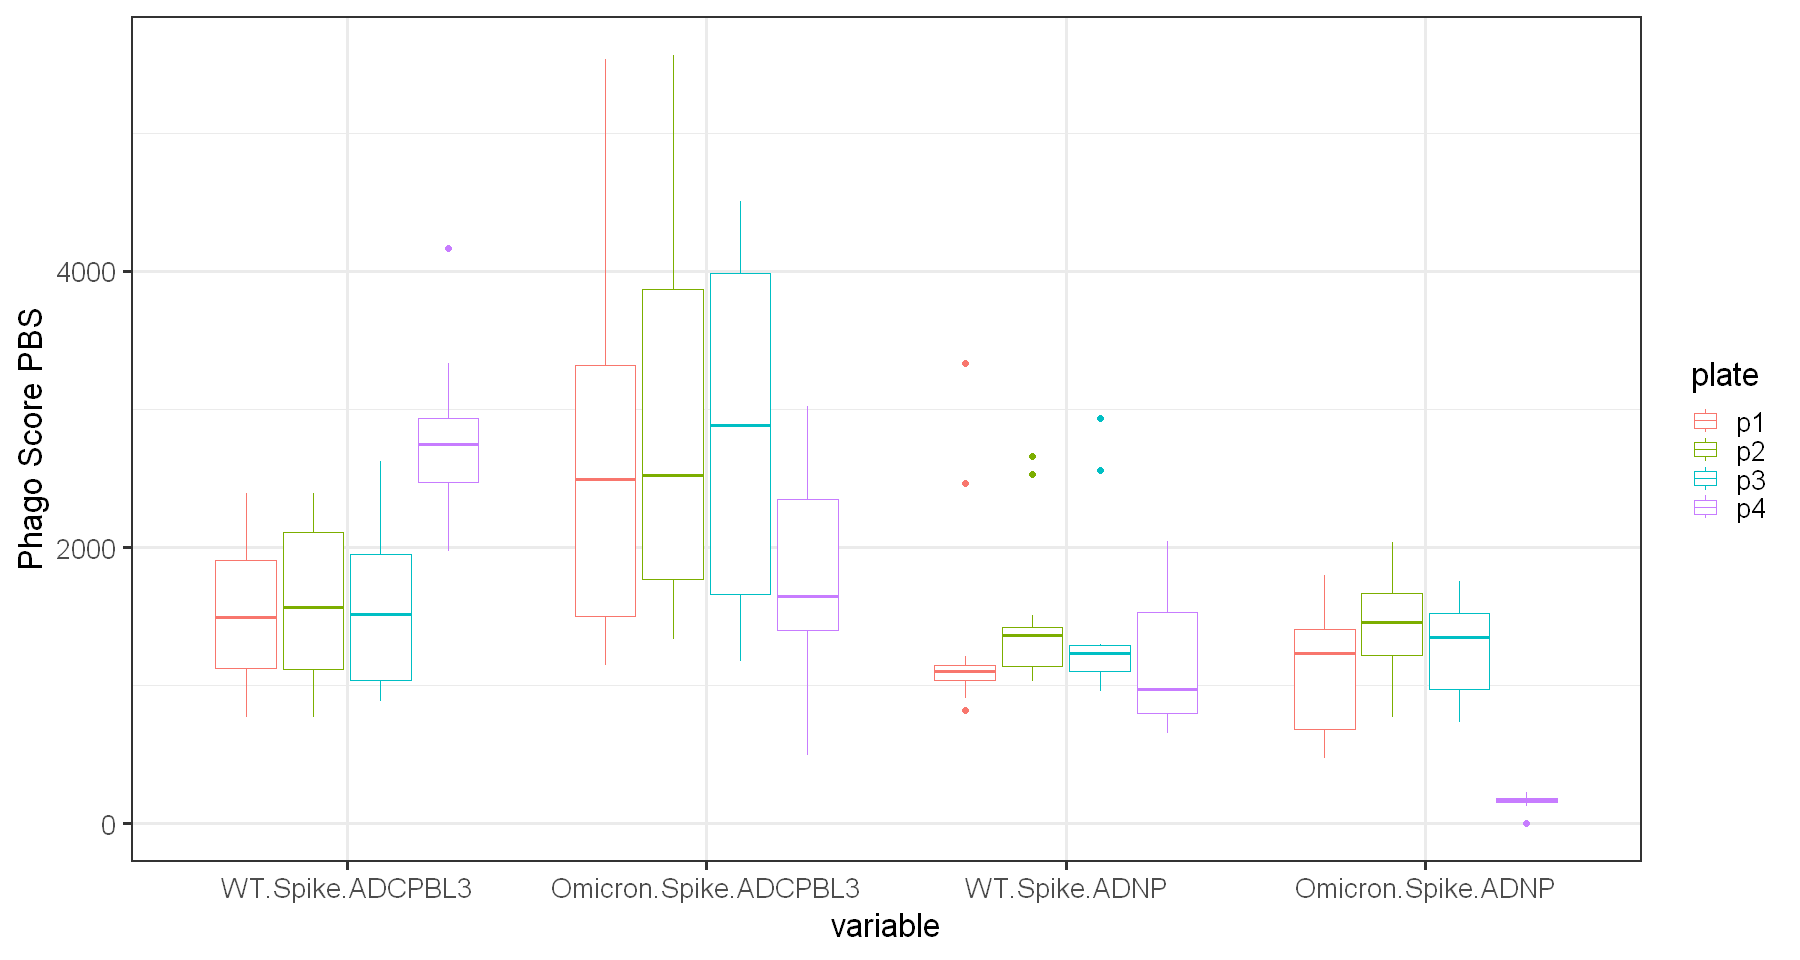

Using plate, Tubelabel, Well, ID as id variables

Warning message:
"Removed 38 rows containing non-finite outside the scale range (`stat_boxplot()`)."


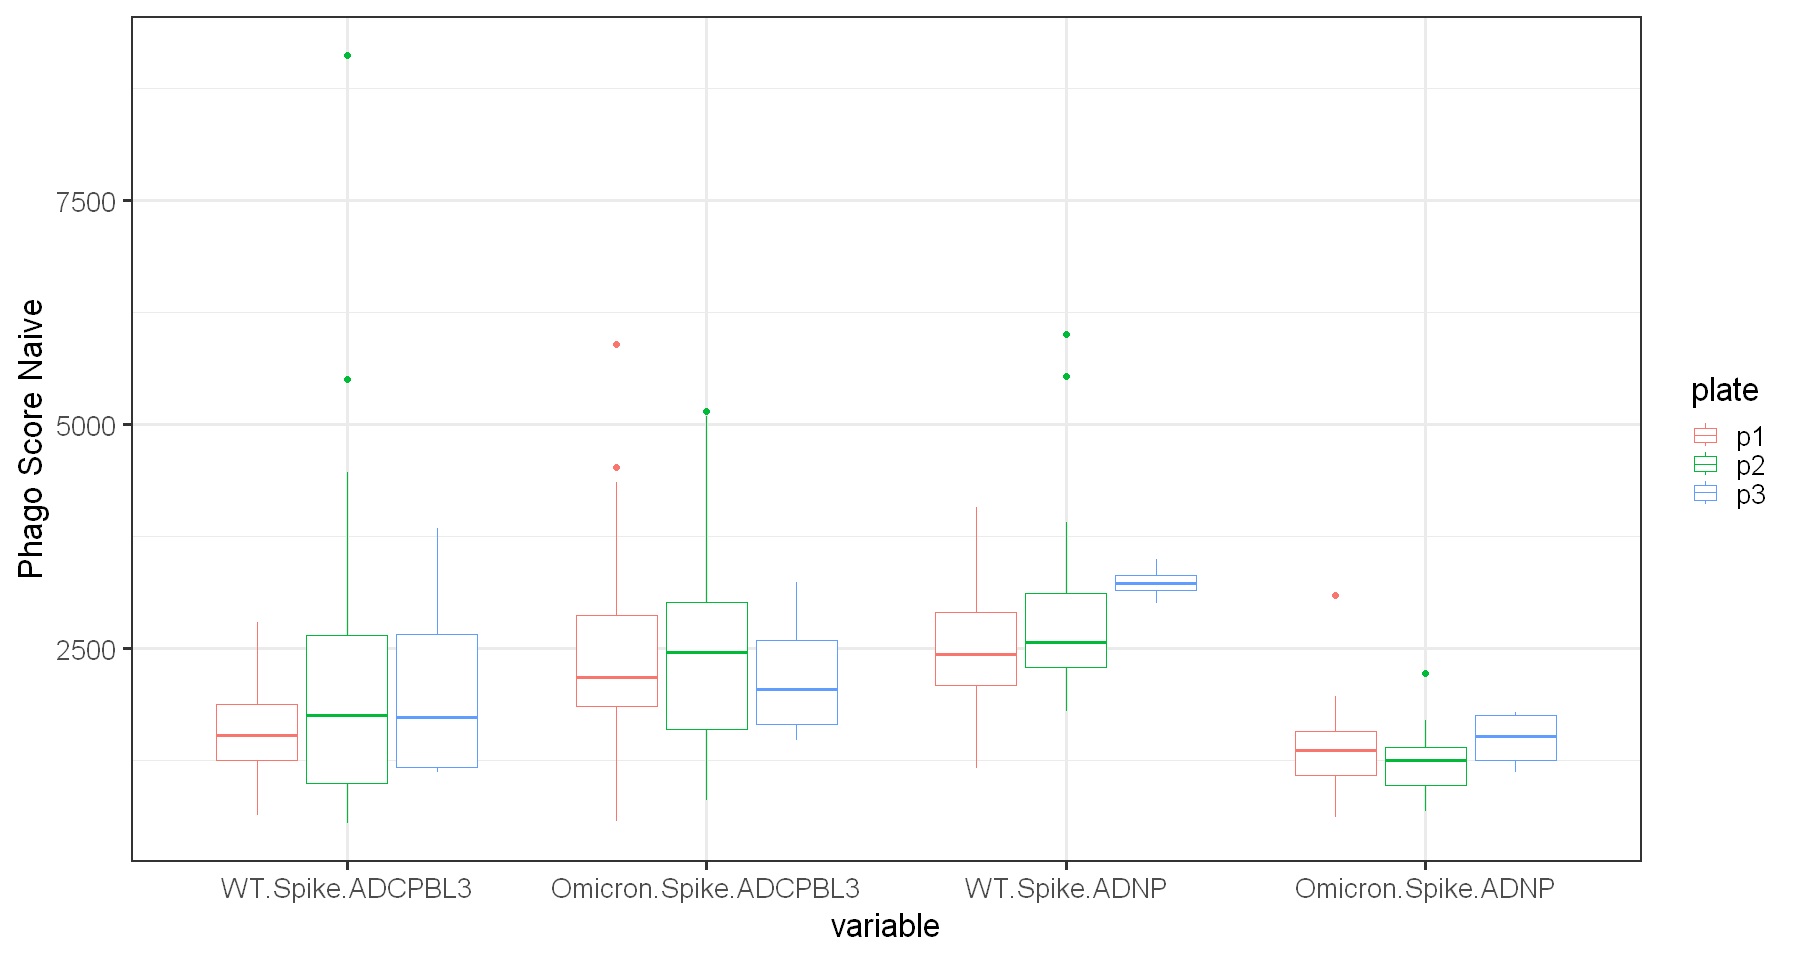

plate,ID,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
p1,Naive,1535.798,2182.097,2442.2374,1368.093
p1,PBS,1496.978,2492.329,1105.0838,1232.615
p2,Naive,1752.655,2457.542,2577.3688,1260.842
p2,PBS,1563.689,2519.082,1363.8792,1461.266
p3,Naive,1732.539,2044.399,3232.5194,1518.032
p3,PBS,1514.664,2884.084,1234.7179,1352.038
p4,PBS,2744.172,1643.160,974.1872,168.617


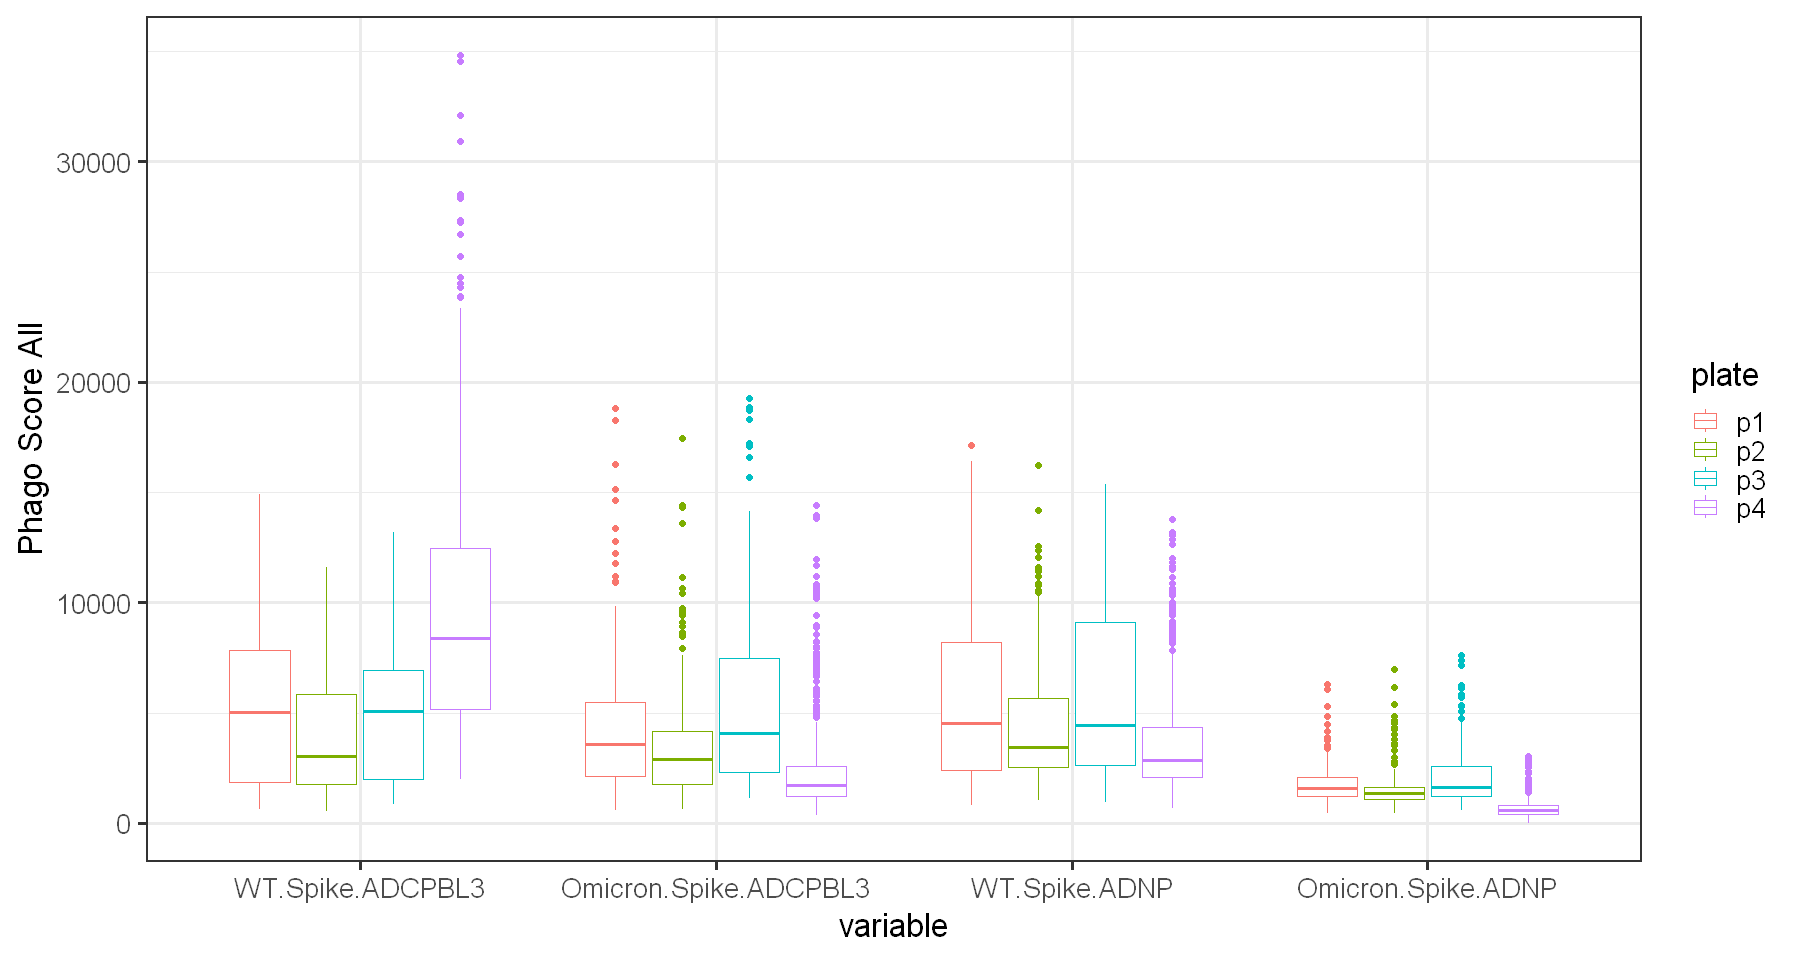

In [27]:


head(data)

# data$plate = c(rep('p1',766),rep('p2',336))
# data$Tubelabel[738:766] = 'Plate1PBS'
# data$Tubelabel[1074:1102] = 'Plate2PBS'

data$Tubelabel = ifelse(data$ID=='PBS',data$plate,data$Tubelabel)

annot_vars = colnames(data)[c(1:4)]
data_vars = colnames(data)[-c(1:4)]

annot_vars
data_vars

# check pbs and naive
options(repr.plot.width=15,repr.plot.height=8)


head(data)

melt(data) %>% filter(ID=='PBS') %>%
    ggplot(aes(x=variable,y=value,color=plate))+
        geom_boxplot()+
        theme_bw(base_size = 20)+ylab('Phago Score PBS')

melt(data) %>% filter(ID=='Naive') %>%
    ggplot(aes(x=variable,y=value,color=plate))+
        geom_boxplot()+
        theme_bw(base_size = 20)+ylab('Phago Score Naive')

melt(data) %>%
    ggplot(aes(x=variable,y=value,color=plate))+
        geom_boxplot()+
        theme_bw(base_size = 20)+ylab('Phago Score All')

data %>% 
    filter(ID%in%c('PBS','Naive')) %>% 
        group_by(plate,ID) %>%
            summarize_if(is.numeric,median,na.rm=T)

In [28]:



# negative biological control normalization (naive)
idx = data$plate!='p4'
pbs_p1  = unlist(apply(data[idx,data_vars],2,median,na.rm=T) )
# pbs_p1  = unlist(apply(data[idx & data$ID=='PBS',data_vars],2,median,na.rm=T) )
naive_p1= unlist(apply(data[idx & data$ID=='Naive',data_vars],2,median,na.rm=T) )
# data[idx,data_vars] = data[idx,data_vars] - pbs_p1

idx = data$plate=='p4'
pbs_p2  = unlist(apply(data[idx,data_vars],2,median,na.rm=T) )
# pbs_p2  = unlist(apply(data[idx & data$ID=='PBS',data_vars],2,median,na.rm=T) )
naive_p2= naive_p1 * (pbs_p2/pbs_p1)
# naive_p2 = naive_p1
                                                                 
# data[data<1] = 1
                                                                 
pbs_p1
pbs_p2
naive_p1
naive_p2

data_norm = data 

# head(data_norm)
     
# foldchange norm
for(pi in paste0('p',1:4)){
    idx=data$plate==pi
    if(pi=='p4'){
        naive_pi=naive_p2
    }else{
        naive_pi= unlist(apply(data[idx & data$ID=='Naive',data_vars],2,median,na.rm=T) )
    }
    # print(naive_pi)
    data_norm[idx,data_vars] = data_norm[idx,data_vars] / do.call(rbind,lapply(1:sum(idx), function(x) naive_pi))
}

# idx=data$plate!='p4'
# data_norm[idx,data_vars] = data_norm[idx,data_vars] / do.call(rbind,lapply(1:sum(idx), function(x) naive_p1))
                              
# idx=data$plate=='p4'
# data_norm[idx,data_vars] = data_norm[idx,data_vars] / do.call(rbind,lapply(1:sum(idx), function(x) naive_p2))
                                                                           

                                                                           
data = data %>% select(-Well,-plate) %>% group_by(Tubelabel,ID) %>%
        summarise_all( mean,na.rm=T ) %>% ungroup() # summarise replicates
                                                                           
data_norm = data_norm %>% select(-Well,-plate)  %>% group_by(Tubelabel,ID) %>%
        summarise_all( mean,na.rm=T ) %>% ungroup() # summarise replicates

data = data %>% filter(ID!='PBS') %>% select(-ID)                                          
data_norm = data_norm %>% filter(ID!='PBS')%>% select(-ID)


WT.Spike.ADCPBL3 Omicron.Spike.ADCPBL3         WT.Spike.ADNP 
             4299.316              3360.232              3706.001 
   Omicron.Spike.ADNP 
             1480.618

WT.Spike.ADCPBL3 Omicron.Spike.ADCPBL3         WT.Spike.ADNP 
            8366.3160             1734.3648             2842.1364 
   Omicron.Spike.ADNP 
             595.4417

WT.Spike.ADCPBL3 Omicron.Spike.ADCPBL3         WT.Spike.ADNP 
             1597.493              2243.734              2565.912 
   Omicron.Spike.ADNP 
             1296.218

WT.Spike.ADCPBL3 Omicron.Spike.ADCPBL3         WT.Spike.ADNP 
            3108.6643             1158.0904             1967.8008 
   Omicron.Spike.ADNP 
             521.2841

Tubelabel,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
P_PUC_H_004_(1)_G4,15310.511,2888.810,3409.972,625.3657
S_PUC_C_064_(1)_G4,1662.435,3856.818,1243.318,1428.2399
S_PUC_C_064_(4)_G4,3332.325,3514.186,2732.044,1578.2241
S_PUC_C_064_(5)_G4,7554.520,5248.311,6733.361,1931.6456
S_PUC_C_064_(6)_G4,5053.421,4048.223,2824.233,1665.9287
S_PUC_C_064_(7)_G4,4037.492,3351.454,2642.787,1470.4710


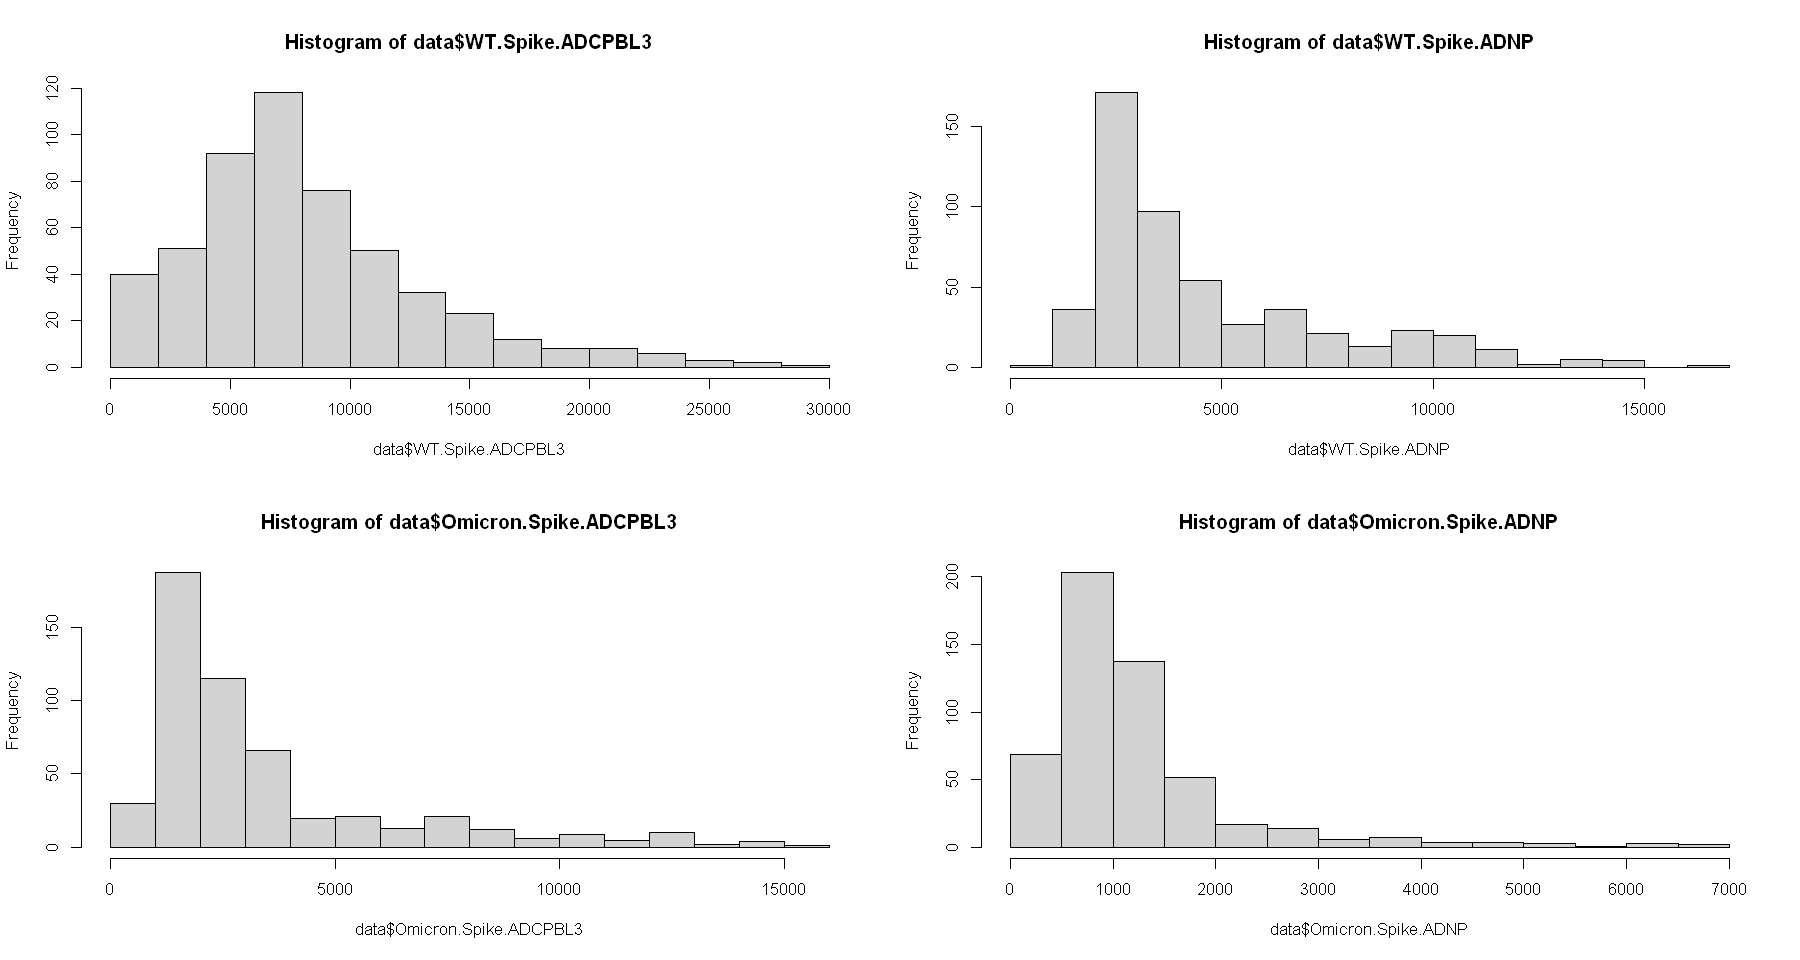

In [29]:
head(data)


par(mfrow=c(2,2))
hist(data$WT.Spike.ADCPBL3)
hist(data$WT.Spike.ADNP)
hist(data$Omicron.Spike.ADCPBL3)
hist(data$Omicron.Spike.ADNP)

In [30]:
dim(data_lum)
dim(data)

[1] 522 249

[1] 522   5

In [31]:
data=    merge(data_lum%>%select(-Well) ,
               data   , 
               by.x=c('Tube.Label'),by.y=c('Tubelabel'),all=T)
data_norm=    merge(data_norm_lum%>%select(-Well) , 
                    data_norm  ,
                    by.x=c('Tube.Label'),by.y=c('Tubelabel'),all=T)


# tmp[duplicated(tmp$Tube.Label,fromLast = F) | duplicated(tmp$Tube.Label,fromLast = T),] %>% arrange(Tube.Label)
# head(tmp[sample(1:nrow(tmp),10),],10)
# dim(data_lum)
dim(data)
dim(data_norm)

[1] 522 252

[1] 522 252

In [32]:
head(data_norm)

,Tube.Label,Lab.ID,PlateNum,SampleNum,PlateID,PlateCoord,ID,BOX,Vaccine,Time.sample,...,HCMVgB.Antigen.R3b,Influenza.HA.R3b,EBOV.Antigen.R3b,Omicron.RBD.R3b,Omicron.Spike.R3b,WT.Spike.NeutIC50,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P_PUC_H_004_(1)_G4,p4 2020 G4,60,228,3,E12,Hosp-1,3,NA,D21,...,0.7130519,2.1023126,1.1139047,1.005942,1.0491911,21.08226449,4.925109,2.494460,1.7328847,1.199664
2,S_PUC_C_064_(1)_G4,C64 2020 G4,1,1,1,A1,Naive,1,Naive,PRE,...,0.9851430,0.6880567,0.9717149,1.364866,1.0333011,12.37603974,1.082457,1.767482,0.5090898,1.043964
3,S_PUC_C_064_(4)_G4,C64 2020 G4,2,2,1,A2,CoronaVac,1,CoronaVac,D28,...,0.7269212,0.5237457,1.0445086,NaN,1.1480586,0.52779625,2.169767,1.610463,1.1186644,1.153594
4,S_PUC_C_064_(5)_G4,C64 2020 G4,3,3,1,A3,CoronaVac2,1,CoronaVac-2,D42,...,0.8511148,0.5894090,0.9828421,1.248557,1.0535443,4.45675708,4.918953,2.405168,2.7570459,1.411925
5,S_PUC_C_064_(6)_G4,C64 2020 G4,4,4,1,A4,CoronaVac2-3,1,CoronaVac2-2,M3,...,0.7660075,3.5040128,1.0576743,1.176236,0.9783059,NA,3.290420,1.855198,1.1564122,1.217701
6,S_PUC_C_064_(7)_G4,C64 2020 G4,5,5,1,A5,CoronaVac2-5,1,CoronaVac2-3,M6,...,0.9955660,NaN,1.0739828,1.120212,1.0027636,0.01673196,2.628921,1.535886,1.0821173,1.074832


In [33]:
unique(data_norm$vaccine)

[1] "Hosp"              "Naive"             "CoronaVac"        
 [4] "Pfizer"            "CoronaVac2+Pfizer" "HospCoronaVac"    
 [7] "HospCoronaVac-"    "Hosp-1"            "HospPfizer-"      
[10] "Out"               "Out-1"             "OutCoronaVac"     
[13] "OutPfizer"         "OutCoronaVac-"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 112 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 112 rows containing missing values or values outside the scale range (`geom_point()`)."


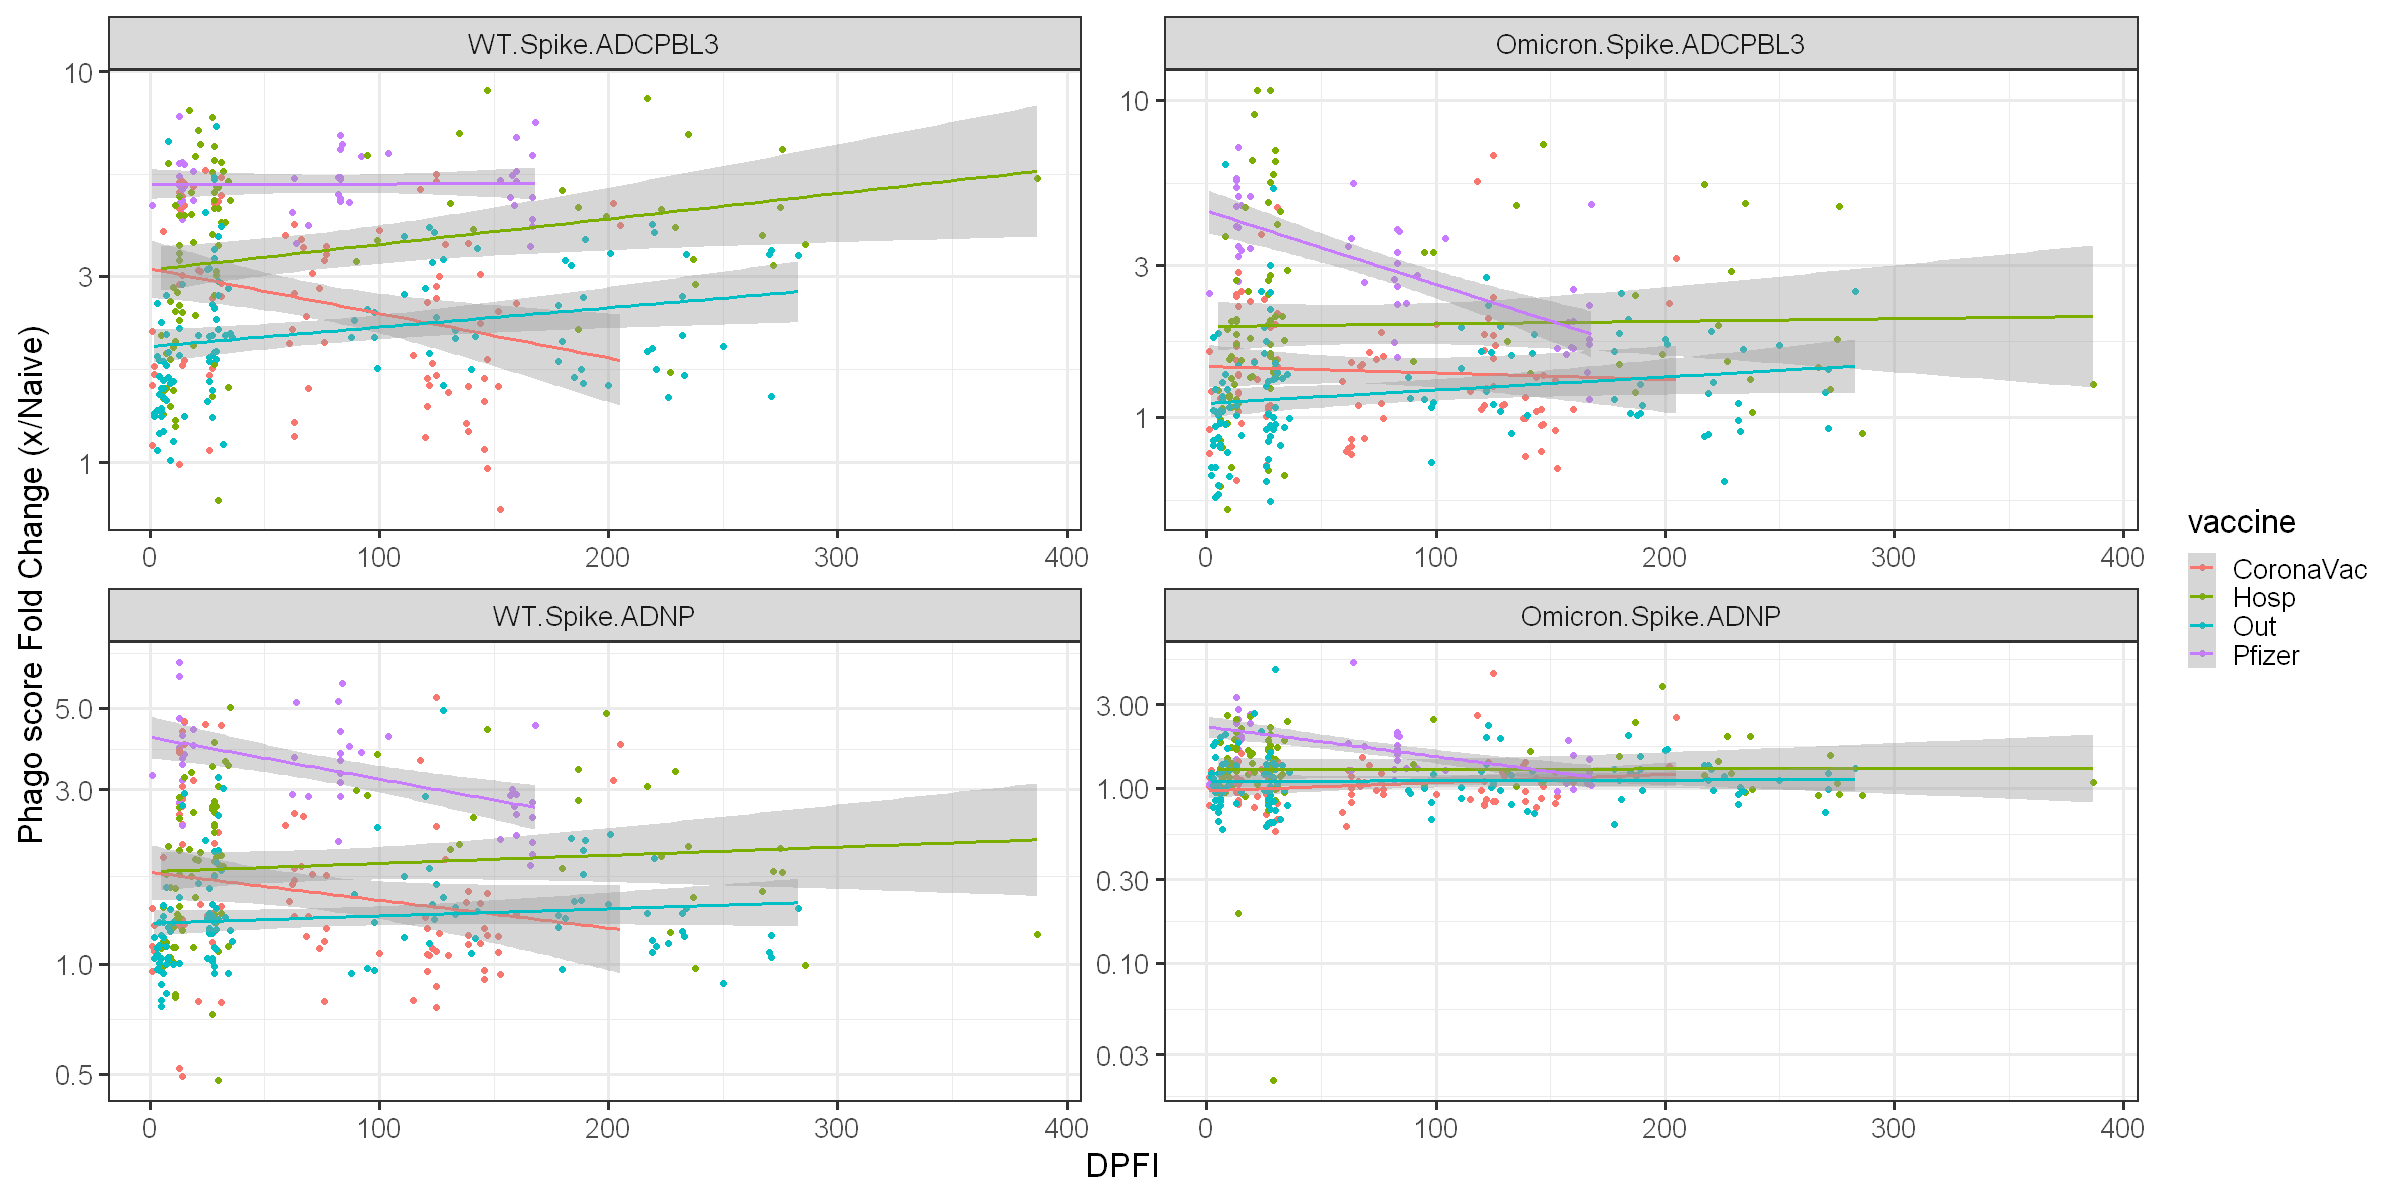

In [34]:
options(repr.plot.width=20,repr.plot.height=10)

data_norm %>% 
    select(vaccine,DPFD,DPSD,WT.Spike.ADCPBL3,Omicron.Spike.ADCPBL3,WT.Spike.ADNP,Omicron.Spike.ADNP) %>% 
    melt(id.vars = c('vaccine','DPFD','DPSD')) %>%
    mutate(
        DPFI = if_else(vaccine%in%c('Hosp','Out'),DPFD,DPSD)
    ) %>%
    filter( vaccine%in%c('Pfizer','CoronaVac','Hosp','Out')) %>%
    ggplot(aes(x=DPFI,color=vaccine,y=value))+
        geom_point()+stat_smooth(method='lm')+facet_wrap(~variable,scale='free')+
        theme_bw(base_size = 20)+
        scale_y_log10()+ylab('Phago score Fold Change (x/Naive)')

# Back effect

In [35]:
# colnames(data_norm)


In [36]:
    # annot_vars = colnames(data_norm)[c(1:14,36:37)]
annot_vars = c('Tube.Label','Lab.ID','ID','PlateNum','SampleNum','PlateID','PlateCoord','BOX','Vaccine','Time.sample','DPFD','DPSD','DPTD','order','vaccine','group')
annot_vars
data_vars = colnames(data_norm)[ ! colnames(data_norm) %in% annot_vars ]
    # data_vars = grep('\\.',colnames(data_norm)[15:ncol(data_norm)],value=T)
data_vars



[1] "Tube.Label"  "Lab.ID"      "ID"          "PlateNum"    "SampleNum"  
 [6] "PlateID"     "PlateCoord"  "BOX"         "Vaccine"     "Time.sample"
[11] "DPFD"        "DPSD"        "DPTD"        "order"       "vaccine"    
[16] "group"

[1] "WT.Spike.C1q"          "WT.RBD.C1q"            "WT.S1.C1q"            
  [4] "WT.S2.C1q"             "WT.NTD.C1q"            "WT.N.C1q"             
  [7] "Alpha.RBD.C1q"         "Alpha.Spike.C1q"       "Beta.RBD.C1q"         
 [10] "Beta.Spike.C1q"        "Gamma.RBD.C1q"         "Gamma.Spike.C1q"      
 [13] "Delta.RBD.C1q"         "Delta.Spike.C1q"       "OC43.Spike.C1q"       
 [16] "HKU1.Spike.C1q"        "HCMVgB.Antigen.C1q"    "Influenza.HA.C1q"     
 [19] "EBOV.Antigen.C1q"      "Omicron.RBD.C1q"       "Omicron.Spike.C1q"    
 [22] "WT.Spike.IgA1"         "WT.RBD.IgA1"           "WT.S1.IgA1"           
 [25] "WT.S2.IgA1"            "WT.NTD.IgA1"           "WT.N.IgA1"            
 [28] "Alpha.RBD.IgA1"        "Alpha.Spike.IgA1"      "Beta.RBD.IgA1"        
 [31] "Beta.Spike.IgA1"       "Gamma.RBD.IgA1"        "Gamma.Spike.IgA1"     
 [34] "Delta.RBD.IgA1"        "Delta.Spike.IgA1"      "OC43.Spike.IgA1"      
 [37] "HKU1.Spike.IgA1"       "HCMVgB.Antigen.IgA1"   "Influenza.HA.IgA1"    
 [40] "EBOV.Antigen.IgA1"     "Omicron.RBD.IgA1"      "Omicron.Spike.IgA1"   
 [43] "WT.Spike.IgG1"         "WT.RBD.IgG1"           "WT.S1.IgG1"           
 [46] "WT.S2.IgG1"            "WT.NTD.IgG1"           "WT.N.IgG1"            
 [49] "Alpha.RBD.IgG1"        "Alpha.Spike.IgG1"      "Beta.RBD.IgG1"        
 [52] "Beta.Spike.IgG1"       "Gamma.RBD.IgG1"        "Gamma.Spike.IgG1"     
 [55] "Delta.RBD.IgG1"        "Delta.Spike.IgG1"      "OC43.Spike.IgG1"      
 [58] "HKU1.Spike.IgG1"       "HCMVgB.Antigen.IgG1"   "Influenza.HA.IgG1"    
 [61] "EBOV.Antigen.IgG1"     "Omicron.RBD.IgG1"      "Omicron.Spike.IgG1"   
 [64] "WT.Spike.IgG2"         "WT.RBD.IgG2"           "WT.S1.IgG2"           
 [67] "WT.S2.IgG2"            "WT.NTD.IgG2"           "WT.N.IgG2"            
 [70] "Alpha.RBD.IgG2"        "Alpha.Spike.IgG2"      "Beta.RBD.IgG2"        
 [73] "Beta.Spike.IgG2"       "Gamma.RBD.IgG2"        "Gamma.Spike.IgG2"     
 [76] "Delta.RBD.IgG2"        "Delta.Spike.IgG2"      "OC43.Spike.IgG2"      
 [79] "HKU1.Spike.IgG2"       "HCMVgB.Antigen.IgG2"   "Influenza.HA.IgG2"    
 [82] "EBOV.Antigen.IgG2"     "Omicron.RBD.IgG2"      "Omicron.Spike.IgG2"   
 [85] "WT.Spike.IgG3"         "WT.RBD.IgG3"           "WT.S1.IgG3"           
 [88] "WT.S2.IgG3"            "WT.NTD.IgG3"           "WT.N.IgG3"            
 [91] "Alpha.RBD.IgG3"        "Alpha.Spike.IgG3"      "Beta.RBD.IgG3"        
 [94] "Beta.Spike.IgG3"       "Gamma.RBD.IgG3"        "Gamma.Spike.IgG3"     
 [97] "Delta.RBD.IgG3"        "Delta.Spike.IgG3"      "OC43.Spike.IgG3"      
[100] "HKU1.Spike.IgG3"       "HCMVgB.Antigen.IgG3"   "Influenza.HA.IgG3"    
[103] "EBOV.Antigen.IgG3"     "Omicron.RBD.IgG3"      "Omicron.Spike.IgG3"   
[106] "WT.Spike.IgG4"         "WT.RBD.IgG4"           "WT.S1.IgG4"           
[109] "WT.S2.IgG4"            "WT.NTD.IgG4"           "WT.N.IgG4"            
[112] "Alpha.RBD.IgG4"        "Alpha.Spike.IgG4"      "Beta.RBD.IgG4"        
[115] "Beta.Spike.IgG4"       "Gamma.RBD.IgG4"        "Gamma.Spike.IgG4"     
[118] "Delta.RBD.IgG4"        "Delta.Spike.IgG4"      "OC43.Spike.IgG4"      
[121] "HKU1.Spike.IgG4"       "HCMVgB.Antigen.IgG4"   "Influenza.HA.IgG4"    
[124] "EBOV.Antigen.IgG4"     "Omicron.RBD.IgG4"      "Omicron.Spike.IgG4"   
[127] "WT.Spike.IgM"          "WT.RBD.IgM"            "WT.S1.IgM"            
[130] "WT.S2.IgM"             "WT.NTD.IgM"            "WT.N.IgM"             
[133] "Alpha.RBD.IgM"         "Alpha.Spike.IgM"       "Beta.RBD.IgM"         
[136] "Beta.Spike.IgM"        "Gamma.RBD.IgM"         "Gamma.Spike.IgM"      
[139] "Delta.RBD.IgM"         "Delta.Spike.IgM"       "OC43.Spike.IgM"       
[142] "HKU1.Spike.IgM"        "HCMVgB.Antigen.IgM"    "Influenza.HA.IgM"     
[145] "EBOV.Antigen.IgM"      "Omicron.RBD.IgM"       "Omicron.Spike.IgM"    
[148] "WT.Spike.R2a"          "WT.RBD.R2a"            "WT.S1.R2a"            
[151] "WT.S2.R2a"             "WT.NTD.R2a"            "WT.N.R2a"             
[154] "Alpha.RBD.R2a"   

In [37]:
annot_vars = c('Tube.Label','Lab.ID','ID','PlateNum','SampleNum','PlateID','PlateCoord','BOX','Vaccine','Time.sample','DPFD','DPSD','DPTD','order','vaccine','group')
annot_vars
data_vars = colnames(data)[ ! colnames(data) %in% annot_vars ]
    # data_vars = grep('\\.',colnames(data_norm)[15:ncol(data_norm)],value=T)
data_vars


[1] "Tube.Label"  "Lab.ID"      "ID"          "PlateNum"    "SampleNum"  
 [6] "PlateID"     "PlateCoord"  "BOX"         "Vaccine"     "Time.sample"
[11] "DPFD"        "DPSD"        "DPTD"        "order"       "vaccine"    
[16] "group"

[1] "WT.Spike.C1q"          "WT.RBD.C1q"            "WT.S1.C1q"            
  [4] "WT.S2.C1q"             "WT.NTD.C1q"            "WT.N.C1q"             
  [7] "Alpha.RBD.C1q"         "Alpha.Spike.C1q"       "Beta.RBD.C1q"         
 [10] "Beta.Spike.C1q"        "Gamma.RBD.C1q"         "Gamma.Spike.C1q"      
 [13] "Delta.RBD.C1q"         "Delta.Spike.C1q"       "OC43.Spike.C1q"       
 [16] "HKU1.Spike.C1q"        "HCMVgB.Antigen.C1q"    "Influenza.HA.C1q"     
 [19] "EBOV.Antigen.C1q"      "Omicron.RBD.C1q"       "Omicron.Spike.C1q"    
 [22] "WT.Spike.IgA1"         "WT.RBD.IgA1"           "WT.S1.IgA1"           
 [25] "WT.S2.IgA1"            "WT.NTD.IgA1"           "WT.N.IgA1"            
 [28] "Alpha.RBD.IgA1"        "Alpha.Spike.IgA1"      "Beta.RBD.IgA1"        
 [31] "Beta.Spike.IgA1"       "Gamma.RBD.IgA1"        "Gamma.Spike.IgA1"     
 [34] "Delta.RBD.IgA1"        "Delta.Spike.IgA1"      "OC43.Spike.IgA1"      
 [37] "HKU1.Spike.IgA1"       "HCMVgB.Antigen.IgA1"   "Influenza.HA.IgA1"    
 [40] "EBOV.Antigen.IgA1"     "Omicron.RBD.IgA1"      "Omicron.Spike.IgA1"   
 [43] "WT.Spike.IgG1"         "WT.RBD.IgG1"           "WT.S1.IgG1"           
 [46] "WT.S2.IgG1"            "WT.NTD.IgG1"           "WT.N.IgG1"            
 [49] "Alpha.RBD.IgG1"        "Alpha.Spike.IgG1"      "Beta.RBD.IgG1"        
 [52] "Beta.Spike.IgG1"       "Gamma.RBD.IgG1"        "Gamma.Spike.IgG1"     
 [55] "Delta.RBD.IgG1"        "Delta.Spike.IgG1"      "OC43.Spike.IgG1"      
 [58] "HKU1.Spike.IgG1"       "HCMVgB.Antigen.IgG1"   "Influenza.HA.IgG1"    
 [61] "EBOV.Antigen.IgG1"     "Omicron.RBD.IgG1"      "Omicron.Spike.IgG1"   
 [64] "WT.Spike.IgG2"         "WT.RBD.IgG2"           "WT.S1.IgG2"           
 [67] "WT.S2.IgG2"            "WT.NTD.IgG2"           "WT.N.IgG2"            
 [70] "Alpha.RBD.IgG2"        "Alpha.Spike.IgG2"      "Beta.RBD.IgG2"        
 [73] "Beta.Spike.IgG2"       "Gamma.RBD.IgG2"        "Gamma.Spike.IgG2"     
 [76] "Delta.RBD.IgG2"        "Delta.Spike.IgG2"      "OC43.Spike.IgG2"      
 [79] "HKU1.Spike.IgG2"       "HCMVgB.Antigen.IgG2"   "Influenza.HA.IgG2"    
 [82] "EBOV.Antigen.IgG2"     "Omicron.RBD.IgG2"      "Omicron.Spike.IgG2"   
 [85] "WT.Spike.IgG3"         "WT.RBD.IgG3"           "WT.S1.IgG3"           
 [88] "WT.S2.IgG3"            "WT.NTD.IgG3"           "WT.N.IgG3"            
 [91] "Alpha.RBD.IgG3"        "Alpha.Spike.IgG3"      "Beta.RBD.IgG3"        
 [94] "Beta.Spike.IgG3"       "Gamma.RBD.IgG3"        "Gamma.Spike.IgG3"     
 [97] "Delta.RBD.IgG3"        "Delta.Spike.IgG3"      "OC43.Spike.IgG3"      
[100] "HKU1.Spike.IgG3"       "HCMVgB.Antigen.IgG3"   "Influenza.HA.IgG3"    
[103] "EBOV.Antigen.IgG3"     "Omicron.RBD.IgG3"      "Omicron.Spike.IgG3"   
[106] "WT.Spike.IgG4"         "WT.RBD.IgG4"           "WT.S1.IgG4"           
[109] "WT.S2.IgG4"            "WT.NTD.IgG4"           "WT.N.IgG4"            
[112] "Alpha.RBD.IgG4"        "Alpha.Spike.IgG4"      "Beta.RBD.IgG4"        
[115] "Beta.Spike.IgG4"       "Gamma.RBD.IgG4"        "Gamma.Spike.IgG4"     
[118] "Delta.RBD.IgG4"        "Delta.Spike.IgG4"      "OC43.Spike.IgG4"      
[121] "HKU1.Spike.IgG4"       "HCMVgB.Antigen.IgG4"   "Influenza.HA.IgG4"    
[124] "EBOV.Antigen.IgG4"     "Omicron.RBD.IgG4"      "Omicron.Spike.IgG4"   
[127] "WT.Spike.IgM"          "WT.RBD.IgM"            "WT.S1.IgM"            
[130] "WT.S2.IgM"             "WT.NTD.IgM"            "WT.N.IgM"             
[133] "Alpha.RBD.IgM"         "Alpha.Spike.IgM"       "Beta.RBD.IgM"         
[136] "Beta.Spike.IgM"        "Gamma.RBD.IgM"         "Gamma.Spike.IgM"      
[139] "Delta.RBD.IgM"         "Delta.Spike.IgM"       "OC43.Spike.IgM"       
[142] "HKU1.Spike.IgM"        "HCMVgB.Antigen.IgM"    "Influenza.HA.IgM"     
[145] "EBOV.Antigen.IgM"      "Omicron.RBD.IgM"       "Omicron.Spike.IgM"    
[148] "WT.Spike.R2a"          "WT.RBD.R2a"            "WT.S1.R2a"            
[151] "WT.S2.R2a"             "WT.NTD.R2a"            "WT.N.R2a"             
[154] "Alpha.RBD.R2a"   

In [38]:
data = data[,c(annot_vars,data_vars)]
data_norm = data_norm[,c(annot_vars,data_vars)]

# melt data

In [39]:
data_m=melt(data,id.vars = c('PlateNum','SampleNum','PlateID','PlateCoord',#'Well',
                             'ID','vaccine','group','BOX','Lab.ID','Vaccine','Tube.Label','Time.sample','DPFD','DPSD','DPTD','order'))
data_m$antigen  = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,2]
data_m$virus    = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,1]
data_m$affinity = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,3]
data_r = data_m
head(data_m)

data_m=melt(data_norm,id.vars = c('PlateNum','SampleNum','PlateID','PlateCoord',#'Well',
                                  'ID','vaccine','group','BOX','Lab.ID','Vaccine','Tube.Label','Time.sample','DPFD','DPSD','DPTD','order'))
data_m$antigen  = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,2]
data_m$virus    = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,1]
data_m$affinity = do.call(rbind,strsplit(as.character(data_m$variable),'\\.'))[,3]
head(data_m)

,PlateNum,SampleNum,PlateID,PlateCoord,ID,vaccine,group,BOX,Lab.ID,Vaccine,...,Time.sample,DPFD,DPSD,DPTD,order,variable,value,antigen,virus,affinity
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<chr>
1,60,228,3,E12,Hosp-1,Hosp,p,3,p4 2020 G4,NA,...,D21,18,NaN,NaN,455.5,WT.Spike.C1q,2671.75,Spike,WT,C1q
2,1,1,1,A1,Naive,Naive,C,1,C64 2020 G4,Naive,...,PRE,NaN,NaN,NaN,1.5,WT.Spike.C1q,2515.25,Spike,WT,C1q
3,2,2,1,A2,CoronaVac,CoronaVac,C,1,C64 2020 G4,CoronaVac,...,D28,29,1,NaN,3.5,WT.Spike.C1q,2602.00,Spike,WT,C1q
4,3,3,1,A3,CoronaVac2,CoronaVac,C,1,C64 2020 G4,CoronaVac-2,...,D42,41,13,NaN,5.5,WT.Spike.C1q,2579.75,Spike,WT,C1q
5,4,4,1,A4,CoronaVac2-3,CoronaVac,C,1,C64 2020 G4,CoronaVac2-2,...,M3,104,76,NaN,7.5,WT.Spike.C1q,2626.25,Spike,WT,C1q
6,5,5,1,A5,CoronaVac2-5,CoronaVac,C,1,C64 2020 G4,CoronaVac2-3,...,M6,153,125,NaN,9.5,WT.Spike.C1q,2791.00,Spike,WT,C1q


,PlateNum,SampleNum,PlateID,PlateCoord,ID,vaccine,group,BOX,Lab.ID,Vaccine,...,Time.sample,DPFD,DPSD,DPTD,order,variable,value,antigen,virus,affinity
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<chr>,<chr>
1,60,228,3,E12,Hosp-1,Hosp,p,3,p4 2020 G4,NA,...,D21,18,NaN,NaN,455.5,WT.Spike.C1q,1.115553,Spike,WT,C1q
2,1,1,1,A1,Naive,Naive,C,1,C64 2020 G4,Naive,...,PRE,NaN,NaN,NaN,1.5,WT.Spike.C1q,1.050209,Spike,WT,C1q
3,2,2,1,A2,CoronaVac,CoronaVac,C,1,C64 2020 G4,CoronaVac,...,D28,29,1,NaN,3.5,WT.Spike.C1q,1.086430,Spike,WT,C1q
4,3,3,1,A3,CoronaVac2,CoronaVac,C,1,C64 2020 G4,CoronaVac-2,...,D42,41,13,NaN,5.5,WT.Spike.C1q,1.077140,Spike,WT,C1q
5,4,4,1,A4,CoronaVac2-3,CoronaVac,C,1,C64 2020 G4,CoronaVac2-2,...,M3,104,76,NaN,7.5,WT.Spike.C1q,1.096555,Spike,WT,C1q
6,5,5,1,A5,CoronaVac2-5,CoronaVac,C,1,C64 2020 G4,CoronaVac2-3,...,M6,153,125,NaN,9.5,WT.Spike.C1q,1.165344,Spike,WT,C1q


# Save formated data

In [40]:
write.csv(data,file=paste0('../data-final/DS1-annotated_luminex.lum_func.csv'),row.names=F)
write.csv(data_m,file=paste0('../data-final/DS2-annotated_luminex.lum_func.melted.csv'),row.names=F)
write.csv(data_r,file=paste0('../data-final/DS2-annotated_luminex.lum_func.melted.raw.csv'),row.names=F)

In [41]:
print('done')

[1] "done"


In [42]:
stop()

ERROR: Error in eval(expr, envir, enclos): 


# trash

In [ ]:
# head(data_m)

options(repr.plot.width=20,repr.plot.height=6)

data_m %>% filter( antigen%in%c('RBD','Spike') & virus%in%c('WT') & affinity%in%c('IgG1')) %>%
    filter( (vaccine%in%c('CoronaVac','Pfizer') & DPSD>15 & DPSD<350) | #  
           (vaccine=='Naive') |
           (vaccine%in%c('Out','Hosp') & DPFD>20 & DPFD<350 ))  %>%
    ggplot(aes(x=variable,y=value,color=variable))+
        geom_boxplot()+scale_y_log10()+
        ggpubr::stat_compare_means()+ylab('MFI (A.U.)')+
        facet_grid(~gsub('-.*','',vaccine))+
        theme_bw(base_size=20)+ggtitle("All sampels post peak")

l=15; u=90
data_m %>% filter( antigen%in%c('RBD','Spike') & virus%in%c('WT') & affinity%in%c('IgG1')) %>%
    filter( (vaccine%in%c('CoronaVac','Pfizer') & DPSD>l & DPSD<u) | #  
           (vaccine=='Naive') |
           (vaccine%in%c('Out','Hosp') & DPFD>l & DPFD<u ))  %>%
    ggplot(aes(x=variable,y=value,color=variable))+
        geom_boxplot()+scale_y_log10()+
        ggpubr::stat_compare_means()+ylab('MFI (A.U.)')+
        facet_grid(~gsub('-.*','',vaccine))+
        theme_bw(base_size=20)+ggtitle(paste('Near-peak samples:',l,'-',u,'days post 2nd dose or infection'))


l=0; u=20
data_m %>% filter( antigen%in%c('RBD','Spike') & virus%in%c('WT') & affinity%in%c('IgG1')) %>%
    filter( (vaccine%in%c('CoronaVac','Pfizer') & DPSD>l & DPSD<u) | #  
           (vaccine=='Naive') |
           (vaccine%in%c('Out','Hosp') & DPFD>l & DPFD<u ))  %>%
    ggplot(aes(x=variable,y=value,color=variable))+
        geom_boxplot()+scale_y_log10()+
        ggpubr::stat_compare_means()+ylab('MFI (A.U.)')+
        facet_grid(~gsub('-.*','',vaccine))+
        theme_bw(base_size=20)+ggtitle(paste('Near-peak samples:',l,'-',u,'days post 2nd dose or infection'))




In [ ]:
colnames(data_m)
# head(data_m[data_m$group=='C',c('ID','vaccine','group','BOX','Lab.ID','Vaccine','Tube.Label','Time.sample','DPFD','DPSD','DPTD')],n=20)

In [ ]:
options(repr.plot.width=15,repr.plot.height=20)

data_m %>% filter( antigen%in%c('RBD','Spike') & !grepl('\\+',vaccine) &
                  !grepl('-2$|-6$',ID) &
                  affinity%in%c('IgG1') & group=='C' & !virus%in%c('HKU1','OC43')) %>% 
    mutate( antigen=factor(antigen,levels=c('Spike','RBD'))) %>%
    ggplot( aes(x=ID, y=value , fill=trimws(vaccine),shape= antigen))+
        geom_boxplot()+
        geom_jitter(width = .1)+
        facet_grid(virus~antigen)+
        scale_y_log10()+
        scale_fill_manual(values = c('grey','white','lightblue'))+
        theme_bw(base_size = 15)+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [ ]:
infected = read.table('../luminex_data_for_corrections_050924/new_old_together_infected_vaccinated/05_08_24_temp_luminex_infected_new_&_old.tsv',header=T,sep='\t')
# head(infected,n=3)

vax = read.table('../luminex_data_for_corrections_050924/new_old_together_infected_vaccinated/05_08_24_temp_luminex_vaccinated_new_&_old.tsv',header=T,sep='\t')
# head(vax,n=3)

# rerun = rbind(infected,vax)

detectors= unique(gsub('_.*','',colnames(vax)[-(1:161)]))
antigens=gsub('^_','',gsub(paste(detectors,collapse = '|'),'',colnames(vax)[-(1:161)]))
virus=c('WT','Alpha','Beta','Gamma','Delta')

# head(rerun)

In [ ]:
options(repr.plot.width=25,repr.plot.height=6)

cr=do.call(rbind,lapply(detectors,function(d){
    do.call(rbind,lapply(virus,function(v){
  idx=grep(paste0(d,'_',v,'|',v,'_spike_',d,'|',v,'_RBD_',d),(colnames(vax)),value=T,ignore.case = T)
  cr=cor(log10(data.matrix(vax[, idx] +2000)),method = 'pearson',
         use='pairwise.complete.obs')
  cr[!is.finite(cr)]=0
 melt(cr) %>% 
        mutate( 
            run = if_else( grepl('_rerun',Var1,ignore.case=T) & grepl('_rerun',Var2,ignore.case=T), 'rerun',
                          if_else( !grepl('_rerun',Var1,ignore.case=T) & !grepl('_rerun',Var2,ignore.case=T),'old','mixed')),
            same_run= grepl('_rerun',Var1) & grepl('_rerun',Var2) | (!grepl('_rerun',Var1) & !grepl('_rerun',Var2)),
            same_antigen= grepl('spike',Var1,ignore.case=T) & grepl('spike',Var2,ignore.case=T) | (!grepl('spike',Var1,ignore.case=T) & !grepl('spike',Var2,ignore.case=T)),
            antigen = if_else( grepl('spike',Var1,ignore.case=T) & grepl('spike',Var2,ignore.case=T), 'spike',
                              if_else( grepl('RBD',Var1,ignore.case=T) & grepl('RBD',Var2,ignore.case=T),'RBD','mixed')),
            virus=v,detector=d
            ) %>%
        filter(Var1!=Var2)
}))}))

# (cr)
  # heatmap.2( cr,trace='none',margins = c(15,15),Rowv = F,Colv = F)
  
cr %>% filter(detector=='IgG1') %>% filter( grepl('spike',Var1,ignore.case=T) | grepl('spike',Var2,ignore.case=T) ) %>%
  ggplot(aes(x=run,shape=same_antigen,y=value,color=antigen,
             label=ifelse(value>.7,as.character(Var1),NA)))+
    geom_point(size=3,position = position_dodge(width = .1))+
    ggrepel::geom_text_repel()+
    facet_grid(~virus)+
    theme_bw(base_size=20)

cr %>% filter(detector=='IgG1') %>% filter( grepl('RBD',Var1,ignore.case=T) | grepl('RBD',Var2,ignore.case=T) ) %>%
  ggplot(aes(x=run,shape=same_antigen,y=value,color=antigen,
             label=ifelse(value>.7,as.character(Var1),NA)))+
    geom_point(size=3,position = position_dodge(width = .1))+
    ggrepel::geom_text_repel()+
    facet_grid(~virus)+
    theme_bw(base_size=20)

# pm <- GGally::ggpairs(
#   (data.matrix(vax[, idx] )+2e3),
#   columnLabels = idx
# ) #+ #scale_y_log10()+scale_x_log10()+
#    # theme_bw(base_size=20)
# pm
# p_(pm)

In [ ]:
dat_new = read.csv('../luminex_data_for_corrections_050924//new_data/luminex_data_050224.csv',skip = 1)
annot_new = openxlsx::read.xlsx('../luminex_data_for_corrections_050924//new_data/samples_plate_design_new_version_042224.xlsx',sheet=2)
head(annot_new)
dim(annot_new)
head(dat_new)
dim(dat_new)

In [ ]:
dat_new %>% arrange(Well.ID) %>% tail(n=20)

In [ ]:
stop()

In [ ]:
# options(repr.plot.width=25,repr.plot.height=25)

# melt(data_norm[,c('PlateID',data_vars)],id.vars='PlateID') %>%
#     ggplot(aes(x=factor(PlateID),y=value,color=factor(PlateID))) +
#         geom_boxplot()+
#         scale_y_log10()+
#         facet_wrap(~variable)+
#         theme_bw(base_size=20)+
#         theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position = 'none')